<a href="https://colab.research.google.com/github/raregem-AI/Pridicting-Solar-Power-with-Machine-Learning/blob/main/Using_Machine_Learning_to_Forcast_Solar_Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This project is to predict solar power generated in kilowatt using enviromental features like azimuth, angle of incidence, wind direction etc.It will help local consummers of solar energy to know the amount of solar energy that would be generated in the future and let them know if the installed solar energy equipments and materials like the solar pannels, charge controllers, and inverters are working at optimum level which would help them to know  the components efficiency  level to avoid system collapse.
This project can also be used to checkmate the level of effect of climate change to the solar system. 

**Importing** **all** **the** **necessary** **libraries**

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

                                 EXPLORATIVE DATA ANALYSIS(EDA)

**DATA** **COLLECTION**

The source of the data for this project is Kaggle.
It contains 4213 rows of  21 solar energy variables like temperature_2_m_above_gnd	relative_humidity_2_m_above_gnd	mean_sea_level_pressure_MSL	total_precipitation_sfc	snowfall_amount_sfc	total_cloud_cover_sfc	high_cloud_cover_high_cld_lay	medium_cloud_cover_mid_cld_lay	low_cloud_cover_low_cld_lay	shortwave_radiation_backwards_sfc	...	wind_direction_10_m_above_gnd	wind_speed_80_m_above_gnd	wind_direction_80_m_above_gnd	wind_speed_900_mb	wind_direction_900_mb	wind_gust_10_m_above_gnd	angle_of_incidence	zenith	azimuth	generated_power_kw.

Reading the dataset

In [ ]:

Train =pd.read_csv('drive/My Drive/spg.csv')
Test =pd.read_csv('drive/My Drive/spg.csv')

In [ ]:
Train.shape

(4213, 21)

The dataset has 4213 rows and 21 columns

In [ ]:
Test.shape

(4213, 21)

In [ ]:
#the first five rows
Train.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [ ]:
#the last five rows
Train.tail()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


In [ ]:
#check for duplicate
Train[Train.duplicated(keep='first')]

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw


In [ ]:
Train.shape

(4213, 21)

In [ ]:
#check for duplicate
Test[Test.duplicated(keep='first')]

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw


In [ ]:
Test.shape

(4213, 21)

In [ ]:
#the general information of the data
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [ ]:
#Statistical information
Train.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


All the 21 columns are numerical feaatures therefore no task of converting categorical features to numerical features.
There are no missing values

In [ ]:

# Checking for missing values sum
Train.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

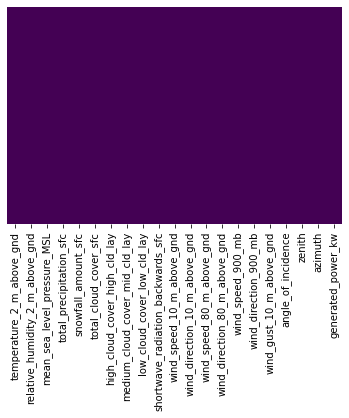

In [ ]:
#missing value graph
sns.heatmap(Train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [ ]:
Train.shape

(4213, 21)

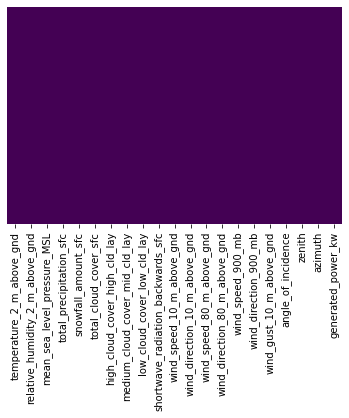

In [ ]:
#missing value graph
sns.heatmap(Test.isnull(), yticklabels=False, cbar=False,cmap='viridis')

It is evidents that there are no missing values

In [ ]:
# Correlation
Train_corrmat = Train.corr()
Train_corrmat

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
temperature_2_m_above_gnd,1.000000,-0.771704,-0.402240,-0.083137,-0.121422,-0.326641,-0.019522,-0.100980,-0.381876,0.665755,...,0.051393,-0.244869,0.086630,-0.198107,0.043233,-0.188264,-0.090173,-0.545646,0.381797,0.217280
relative_humidity_2_m_above_gnd,-0.771704,1.000000,0.100529,0.168660,0.113987,0.402895,0.056452,0.135347,0.490402,-0.721754,...,0.008902,0.212868,-0.019408,0.135464,0.021068,0.144807,0.268460,0.513748,-0.525760,-0.336783
mean_sea_level_pressure_MSL,-0.402240,0.100529,1.000000,-0.159098,-0.053871,-0.151995,-0.014646,-0.129812,-0.162043,-0.188387,...,-0.119867,-0.131442,-0.161020,-0.145696,-0.125234,-0.189266,-0.075619,0.268111,-0.137872,0.150551
total_precipitation_sfc,-0.083137,0.168660,-0.159098,1.000000,0.184497,0.223678,0.076255,0.262367,0.282748,-0.130358,...,0.005234,0.052376,0.007131,0.044797,0.003216,0.066701,-0.020965,-0.023408,0.005749,-0.118442
snowfall_amount_sfc,-0.121422,0.113987,-0.053871,0.184497,1.000000,0.112646,-0.026356,0.042867,0.151609,-0.073499,...,0.039734,0.093156,0.041246,0.100405,0.041716,0.093060,-0.012497,0.033554,0.008426,-0.049508
total_cloud_cover_sfc,-0.326641,0.402895,-0.151995,0.223678,0.112646,1.000000,0.442865,0.712077,0.746225,-0.345089,...,0.055057,0.183732,0.039671,0.174510,0.057816,0.212142,-0.003426,0.136249,-0.037427,-0.334338
high_cloud_cover_high_cld_lay,-0.019522,0.056452,-0.014646,0.076255,-0.026356,0.442865,1.000000,0.593300,0.024703,-0.089620,...,0.017688,0.090049,0.018228,0.078204,0.020897,0.092842,-0.033840,0.031766,0.020790,-0.147723
medium_cloud_cover_mid_cld_lay,-0.100980,0.135347,-0.129812,0.262367,0.042867,0.712077,0.593300,1.000000,0.236716,-0.199843,...,0.016954,0.088972,0.021935,0.076192,0.017195,0.079627,-0.035511,0.046719,0.014802,-0.227834
low_cloud_cover_low_cld_lay,-0.381876,0.490402,-0.162043,0.282748,0.151609,0.746225,0.024703,0.236716,1.000000,-0.336751,...,0.040060,0.156204,0.021782,0.153578,0.039875,0.193846,0.013421,0.120854,-0.054328,-0.288066
shortwave_radiation_backwards_sfc,0.665755,-0.721754,-0.188387,-0.130358,-0.073499,-0.345089,-0.089620,-0.199843,-0.336751,1.000000,...,-0.076530,-0.077090,-0.051670,0.028929,-0.081545,0.017212,-0.576921,-0.801892,0.549296,0.556148


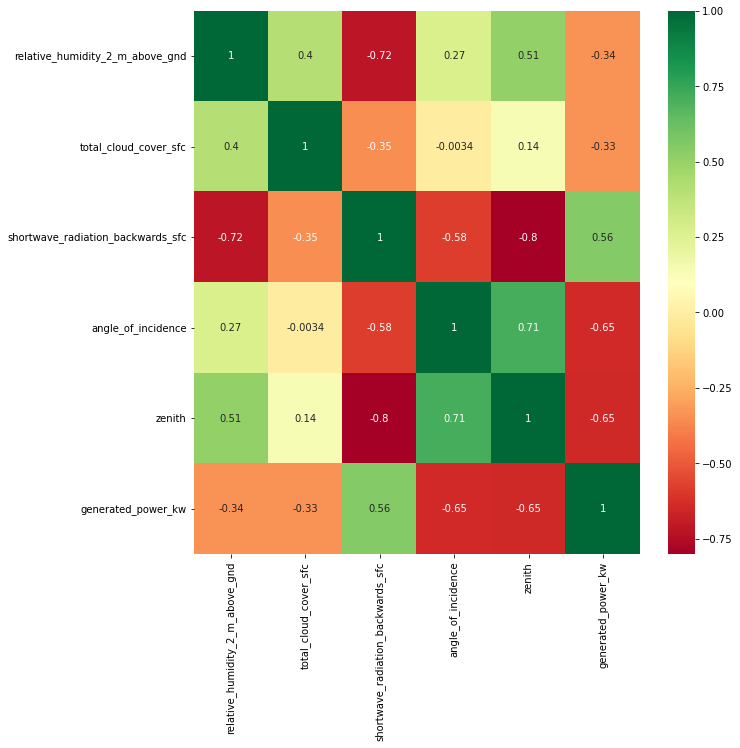

In [ ]:
Top_Features =  Train_corrmat.index[abs(Train_corrmat['generated_power_kw']) >= 0.3]
plt.figure(figsize=(10,10))
T = sns.heatmap(Train[Top_Features].corr(), annot=True, cmap='RdYlGn')
plt.show()

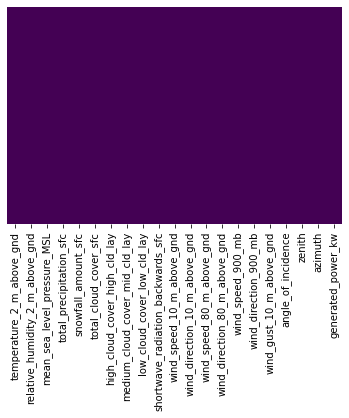

In [ ]:
sns.heatmap(Train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [ ]:
Test = Test.duplicated()
print(Test)

0       False
1       False
2       False
3       False
4       False
        ...  
4208    False
4209    False
4210    False
4211    False
4212    False
Length: 4213, dtype: bool


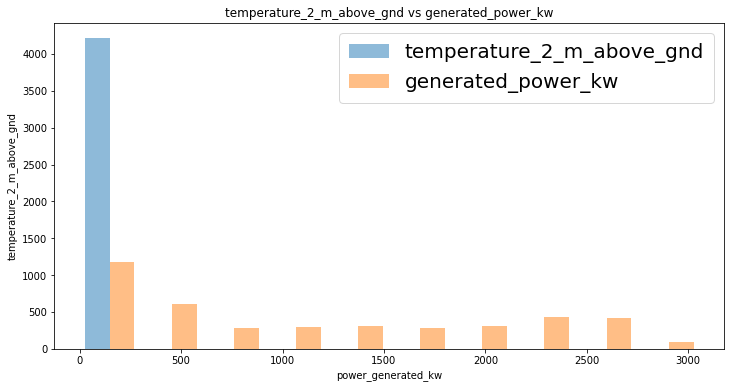

In [ ]:
x1 = Train["temperature_2_m_above_gnd"]
x2 = Train["generated_power_kw"]
plt.figure(figsize= (12,6))
plt.hist([x1,x2], label=[ 'temperature_2_m_above_gnd', 'generated_power_kw'], bins=10,alpha=0.5)
plt.xlabel('power_generated_kw')
plt.ylabel('temperature_2_m_above_gnd')
plt.title('temperature_2_m_above_gnd vs generated_power_kw')
plt.legend(borderpad=0.5,fontsize=20)
plt.show()

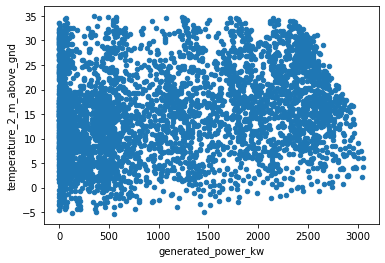

In [ ]:
Train.plot(kind='scatter', y='temperature_2_m_above_gnd', x='generated_power_kw')

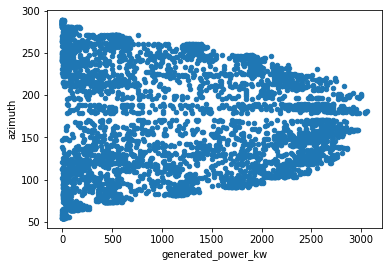

In [ ]:
Train.plot(kind = 'scatter', y = 'azimuth', x='generated_power_kw')

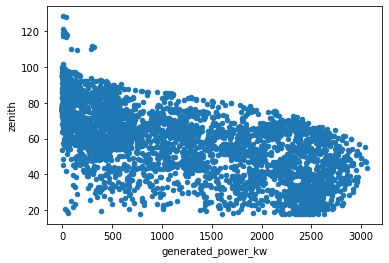

In [ ]:
Train.plot(kind = 'scatter', y = 'zenith', x='generated_power_kw')

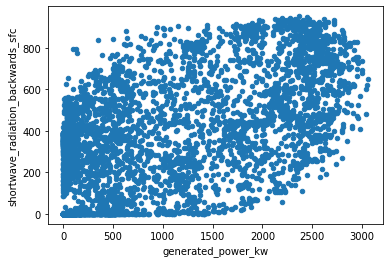

In [ ]:
Train.plot(kind = 'scatter', y = 'shortwave_radiation_backwards_sfc', x='generated_power_kw')

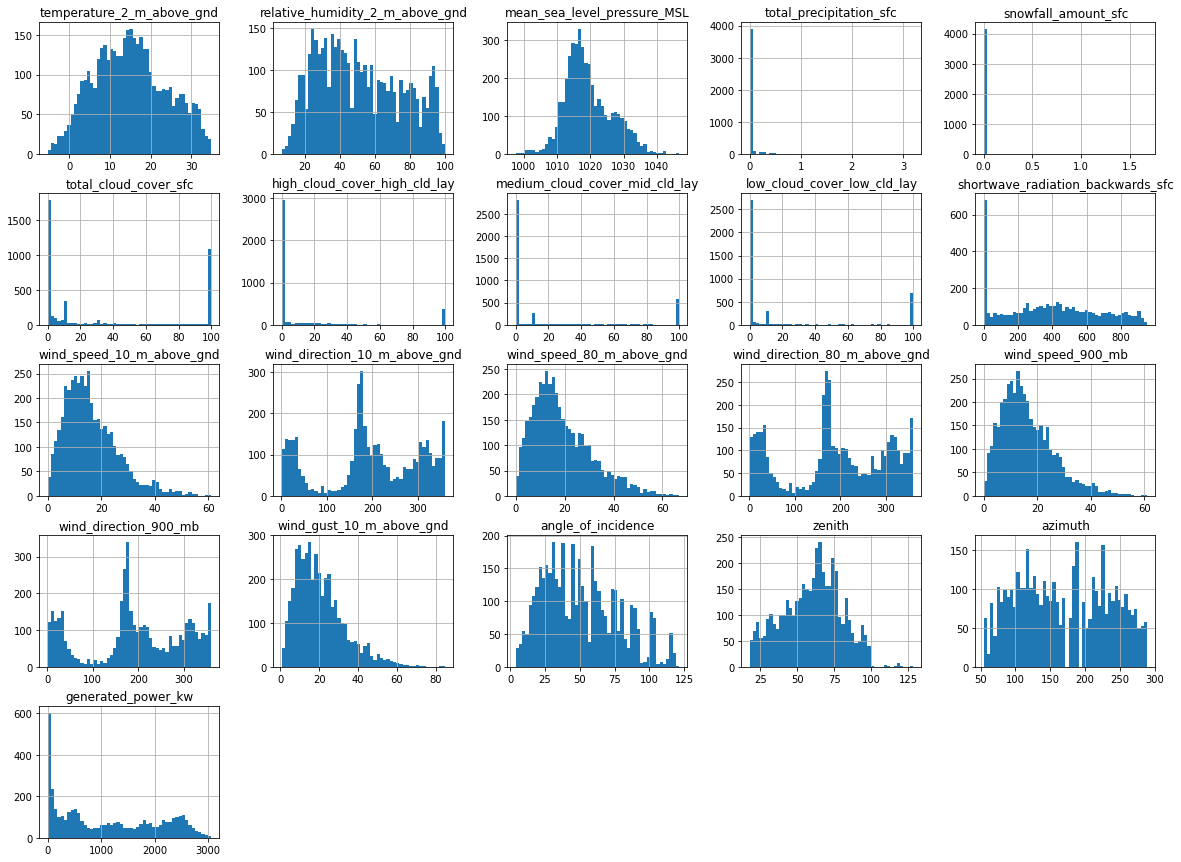

In [ ]:
# Using histograms for numerical data analysis
%matplotlib inline
import matplotlib.pyplot as plt
Train.hist(bins = 50, figsize = (20, 15))
plt.show()

In [ ]:
#sns.pairplot(Train)

#                                                        FEATURES SELECTION

> Indented block



Data spliting

In [ ]:
# Independent variable
X = Train.drop("generated_power_kw", axis = 1)
# dependent variable
y = Train["generated_power_kw"]

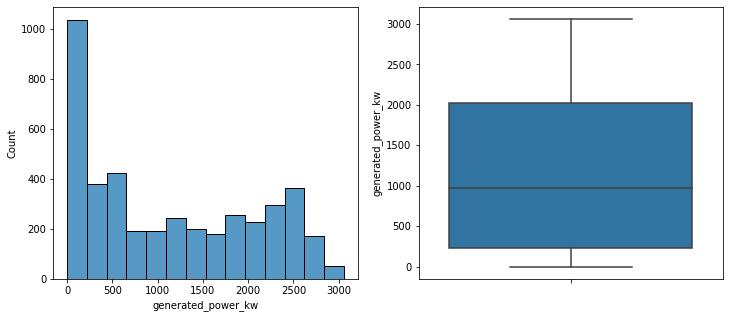

In [ ]:
#Visualize function
def visualize_numeric_feature(data_frame,col_name):
   fig,ax = plt.subplots(1, 2, figsize=(12,5))
   sns.histplot(data=Train,x=col_name, ax = ax[0]);
   sns.boxplot(data= data_frame, y= col_name, ax= ax[1])
visualize_numeric_feature(X,y)

Baseline Model

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
y_pred[:20]

array([1291.35639143,  175.33528871,  454.21382851,  693.42944159,
       1781.23654414, 1133.81627596,  229.90460415,  968.10273805,
       1200.56818201, 1581.93541536, 1777.38025718,  754.16724496,
       1770.28767695, 1109.90539136,  958.65661627, 1040.96659089,
       2207.92116271, 1749.2253764 , 1798.80275213, 2228.60652012])

In [ ]:
#Calculating the mean absolute and root mean squared error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("Baseline Model Mean Absolute Error:", MAE)
print("Baseline Model Root Mean Squared Error:", RMSE)

Baseline Model Mean Absolute Error: 395.6954349762839
Baseline Model Root Mean Squared Error: 510.95219380041937


RandomForest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(random_state =1)
RF_baseline_model = RF.fit(X_train, y_train)

In [ ]:
#Validation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#finding predicted values
y_pred = RF_baseline_model.predict(X_test)

In [ ]:
#Calculating the mean absolute and root mean squared error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("Baseline Model Mean Absolute Error:", MAE)
print("Baseline Model Root Mean Squared Error:", RMSE)

Baseline Model Mean Absolute Error: 270.69215097131337
Baseline Model Root Mean Squared Error: 424.1517762549025


Applying Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RF, step= 1)

In [ ]:
# fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

In [ ]:
print("Number of Features: %d" %fit.n_features_)
print("Selected features: %s" % fit.support_)
print("Features Rankings: %s" % fit.ranking_)

Number of Features: 10
Selected features: [ True  True  True False False  True False False False  True False  True
 False False False False  True  True  True  True]
Features Rankings: [ 1  1  1  9 11  1  8 10  5  1  2  1  4  3  7  6  1  1  1  1]


In [ ]:
#Representing features ranks in the form of table
selected_rfe_features = pd.DataFrame({'Features':list(X_train.columns),'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Features,Ranking
0,temperature_2_m_above_gnd,1
17,angle_of_incidence,1
16,wind_gust_10_m_above_gnd,1
11,wind_direction_10_m_above_gnd,1
18,zenith,1
9,shortwave_radiation_backwards_sfc,1
2,mean_sea_level_pressure_MSL,1
1,relative_humidity_2_m_above_gnd,1
5,total_cloud_cover_sfc,1
19,azimuth,1


In [ ]:
#transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [ ]:
#fitting our baseline model with the tranformed data
RF_rfe_model = RF.fit(X_train_rfe, y_train)

Comparison of model performance with and without feature selection

In [ ]:
#making predictions and evaluating the model
y_pred_rfe = RF_rfe_model.predict(X_test_rfe)
RFE_MAE = mean_absolute_error(y_test, y_pred_rfe)
RFE_MSE = mean_squared_error(y_test, y_pred_rfe)
RFE_RMSE = np.sqrt(RFE_MSE)
print("RFE Mean Absolute Error:",RFE_MAE)
print("RFE Root Mean Squared Error:", RFE_RMSE)

RFE Mean Absolute Error: 273.1245031534196
RFE Root Mean Squared Error: 429.37779041788264


There was an improvement on  model performance with selected 

features comparing it with that of Linear Regression, the RMSE reduced


Feature importance Using Random Forest


In [ ]:
# train a random forest regressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
#create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(random_state =1,n_estimators=1000,n_jobs=-1)

In [ ]:
# fit the model
RF_baseline_model = RF.fit(X_train, y_train)

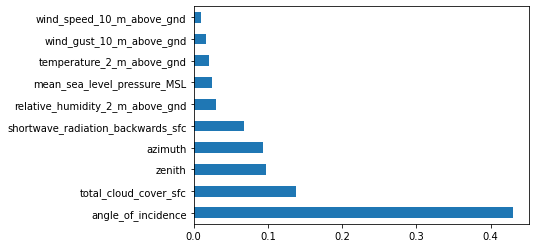

In [ ]:
#Plot graph of features importance for better visualization
feature_importance = pd.Series(RF_baseline_model.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

As we can see from the graph above,

shortwave_radiation_back_wards_sfc, 

azimuth, 

zenith, total_cloud_cover_sfc

and  angle_of_incidence have more importance.









In [ ]:
#Create a selector object that will use the random forest regressor to identify and it will select the most important features base on the importance score
from sklearn.feature_selection import SelectFromModel
RF_SFI = SelectFromModel(RF, threshold=0)

In [ ]:
# train the selector
RF_SFI = RF_SFI.fit(X_train, y_train)

In [ ]:
#create a new subset of the data with only selected features
# transform the data the create a dataset contaning only the mst importanct  features
X_important_train = RF_SFI.transform(X_train)
X_important_test = RF_SFI.transform(X_test)

In [ ]:
#Train  the new random foret regressor
RF_important = RandomForestRegressor(n_estimators=1000, random_state=1, n_jobs=-1)


In [ ]:
# train the new regressor on the new dataset containing the most important features
RF_important = RF_important.fit(X_important_train, y_train)

Comparison of model performance with and without feature selection

In [ ]:
y_pred=RF.predict(X_test)
RF_MAE = mean_absolute_error(y_test,y_pred)
RF_MSE = mean_squared_error(y_test,y_pred)
RF_RMSE = np.sqrt(RF_MSE)

In [ ]:
#View the mean absolute and root mean squared error
print("Baseline model mean absolute error",RF_MAE)
print("Baseline model root  mean squared error",RF_RMSE)

Baseline model mean absolute error 270.74198214884586
Baseline model root  mean squared error 424.5382586042114


In [ ]:
#Apply the full random forest regressor to the test data
y_important_pred = RF_important.predict(X_important_test)

In [ ]:
RF_IMPORTANT_E = mean_absolute_error(y_test,y_important_pred)
RF_IMPORTANT_E_2 = mean_squared_error(y_test, y_important_pred)
RF_IMPORTANT_E_3 = np.sqrt(RF_IMPORTANT_E_2)

In [ ]:
#to view the mean absolute error and root mean squared error of the limited features
MAE = print("Limited Features Model Mean Absolute Error:",RF_IMPORTANT_E)
RMSE = print("Llimited Feature Model Root Mean Squared Error:", RF_IMPORTANT_E_3)

Limited Features Model Mean Absolute Error: 270.7419821488458
Llimited Feature Model Root Mean Squared Error: 424.53825860421136


In [ ]:
# Feature important using  using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)
print(selection.feature_importances_)

[0.01748052 0.02544138 0.02654714 0.00918431 0.00078671 0.11131914
 0.01222059 0.01194419 0.0172336  0.1364574  0.01249443 0.01120209
 0.01237094 0.01155583 0.01175773 0.01123093 0.017452   0.24812116
 0.15789677 0.13730315]


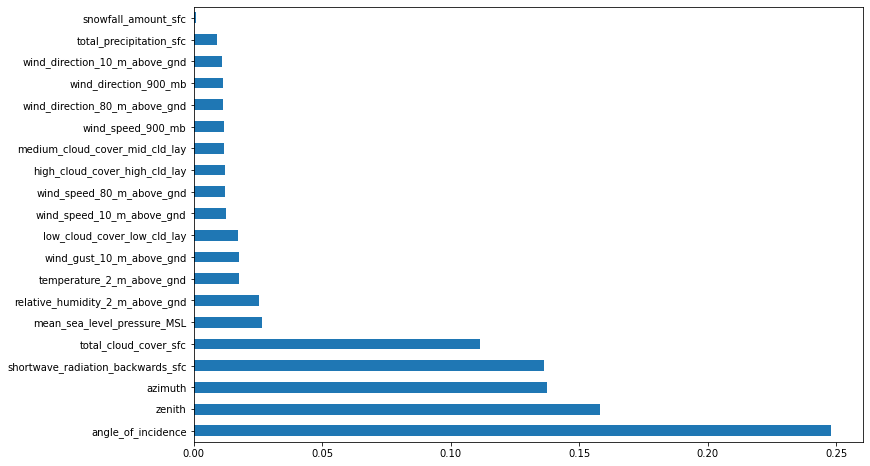

In [ ]:
#Graphicall representation of feature importance
plt.figure(figsize = (12, 8))
feature_importance = pd.Series(selection.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

Feature Selection using Boruta

In [ ]:
from sklearn.feature_selection import SelectFromModel

Train Random Forest Regressor

In [ ]:
RF = RandomForestRegressor(n_jobs=-1, max_depth=10, random_state=1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=1)

In [ ]:
#predict on test data
y_pred = RF.predict(X_test)

In [ ]:
#error metric
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print("Baseline Mean Absolute Error",MAE)
print("Baseline Root Mean Squared Error",RMSE)

Baseline Mean Absolute Error 276.5141740786464
Baseline Root Mean Squared Error 430.92923185009795


Apply Boruta

In [ ]:
#install boruta
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.6 MB/s 


In [ ]:

#import boruta
from boruta import BorutaPy

In [ ]:
#define Boruta feature selection method
boruta_selector = BorutaPy(RF, n_estimators = 'auto', verbose=2, random_state=1)

In [ ]:
#find relevant features
boruta_selector.fit(np.array(X_train),np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	11


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	11


BorutaPy(estimator=RandomForestRegressor(max_depth=10, n_estimators=63,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7F77409147C0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F77409147C0, verbose=2)

In [ ]:
#check selected features
print("Selected Features:", boruta_selector.support_)

Selected Features: [ True  True  True False False  True False False False  True False False
 False False False False  True  True  True  True]


In [ ]:
#check ranking of features
print("Ranking:" ,boruta_selector.ranking_)
print("No of significant features: ", boruta_selector.n_features_)

Ranking: [ 1  1  1  3 12  1 10 11  2  1  4  6  4  8  9  7  1  1  1  1]
No of significant features:  9


In [ ]:
# form a table of the features
Boruta_features = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':boruta_selector.ranking_})
Boruta_features.sort_values(by='Ranking')

,Feature,Ranking
0,temperature_2_m_above_gnd,1
17,angle_of_incidence,1
16,wind_gust_10_m_above_gnd,1
18,zenith,1
5,total_cloud_cover_sfc,1
9,shortwave_radiation_backwards_sfc,1
2,mean_sea_level_pressure_MSL,1
1,relative_humidity_2_m_above_gnd,1
19,azimuth,1
8,low_cloud_cover_low_cld_lay,2


In [ ]:
#A new subset of the data with only the selected features
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [ ]:
# a new random forest regressor for the most important features
RF_2 = RandomForestRegressor(n_estimators=10000,random_state=1,n_jobs=-1)

In [ ]:
RF_2.fit(X_important_train, y_train)

RandomForestRegressor(n_estimators=10000, n_jobs=-1, random_state=1)

Comparison of model performance with and without feature selection

In [ ]:
#Apply the limited regressor to the test data
y_important_pred = RF_2.predict(X_important_test)

In [ ]:
#View the meann absolute and root mean squared error of the limited features
RF_imp_MAE  = mean_squared_error(y_test, y_important_pred)
RF_imp_MSE = mean_squared_error(y_test, y_important_pred)
RF_imp_RMSE = np.sqrt(RF_imp_MSE)

In [ ]:
print("Limited Features Boruta  Model Mean Absolute Error",RF_MAE)
print("Limited Features Boruta Model Root Mean Squared Error", RF_imp_RMSE)

Limited Features Boruta  Model Mean Absolute Error 270.74198214884586
Limited Features Boruta Model Root Mean Squared Error 433.17565815920807


Using XGBOOST to Select Features

In [ ]:
!pip install xgboost#intall xgboost algorithm

ERROR: Invalid requirement: 'xgboost#intall'


In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [ ]:
xgb_model = XGBRegressor(random_state = 0)#to instantiate the the model
xgb_model.fit(X_train, y_train)#to train the model

[13:17:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Feature Importances : [7.9575963e-03 2.3859471e-02 2.1262888e-02 3.1968337e-02 9.5943265e-05
 2.4929795e-01 1.8483466e-02 1.5953502e-02 4.0571608e-02 4.0514078e-02
 9.5202038e-03 1.1611790e-02 6.9900518e-03 5.6618075e-03 5.9173265e-03
 6.5764417e-03 1.4040171e-02 3.1196979e-01 1.2361441e-01 5.4133162e-02]


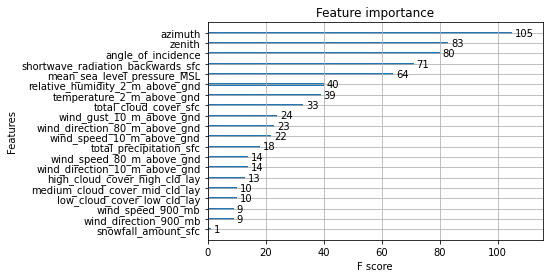

In [ ]:
print("Feature Importances :", xgb_model.feature_importances_)
plot_importance(xgb_model)#plot feature importance
plt.show()

We can see from above that azimuth,zenith, angle_of_incidence, shortwave_radiation backwards sfc, mean_sea_level_pressure_MS, relative_humidity_2_m_avove_gnd , temperature_2_m_above_gnd, total_cloud_sfc  have high importance.

In [ ]:
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(xgb_model)
selection.fit(X_train, y_train)
#Transform the train and tets features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)
# train the model
selection_model = XGBRegressor()
selection_model.fit(select_X_train, y_train)

[13:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred = xgb_model.predict(X_test)
y_pred_2 = xgb_model.predict(X_train)
xgb_AME = mean_absolute_error(y_test, y_pred)
xgb_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_2))
print("XGB Baseline Model Mean absolute error", xgb_AME)
print("XGB Baseline Model root mean absolute error", xgb_RMSE)
print("XGB Baseline Model root mean absolute error", xgb_RMSE_train)

XGB Baseline Model Mean absolute error 303.32978994672914
XGB Baseline Model root mean absolute error 443.4789183653755
XGB Baseline Model root mean absolute error 379.17628668394497


In [ ]:
# Evaluating the model
predictions = selection_model.predict(select_X_test) # predict for selected features of X_test
xgb_mean_absolute_error = mean_absolute_error(y_test, predictions)
xgb_sqrt_mean_squared_error = np.sqrt(mean_squared_error(y_test, predictions))

In [ ]:
# to view the MAE and RMSE of limited features model
print("Limited Feastures XGBoost Model Mean Absolute Error", xgb_mean_absolute_error)
print("Limited Features XGBoost Model Root Mean Square Error", xgb_sqrt_mean_squared_error)

Limited Feastures XGBoost Model Mean Absolute Error 338.1479921741754
Limited Features XGBoost Model Root Mean Square Error 494.7610798596131


**TRAINING A NEW MODEL**

In [ ]:
Train_Selected = Train[['azimuth', 'zenith', 'angle_of_incidence', 'shortwave_radiation_backwards_sfc', 'mean_sea_level_pressure_MSL', 
                'relative_humidity_2_m_above_gnd', 'temperature_2_m_above_gnd', 'wind_gust_10_m_above_gnd',
               'wind_speed_80_m_above_gnd',#'wind_direction_10_m_above_gnd',#'total_precipitation_sfc',
               'generated_power_kw']]

In [ ]:
Train_Selected.head()

,azimuth,zenith,angle_of_incidence,shortwave_radiation_backwards_sfc,mean_sea_level_pressure_MSL,relative_humidity_2_m_above_gnd,temperature_2_m_above_gnd,wind_gust_10_m_above_gnd,wind_speed_80_m_above_gnd,generated_power_kw
0,128.33543,83.237322,58.753108,0.00,1035.0,31,2.17,24.48,9.36,454.10095
1,139.65530,75.143041,45.408585,1.78,1035.1,27,2.31,21.96,5.99,1411.99940
2,152.53769,68.820648,32.848282,108.58,1035.4,33,3.65,14.04,3.89,2214.84930
3,166.90159,64.883536,22.699288,258.10,1035.4,30,5.82,19.80,3.55,2527.60920
4,182.13526,63.795208,19.199908,375.58,1034.4,27,7.73,16.56,6.76,2640.20340


In [ ]:
Train_Selected.shape

(4213, 10)

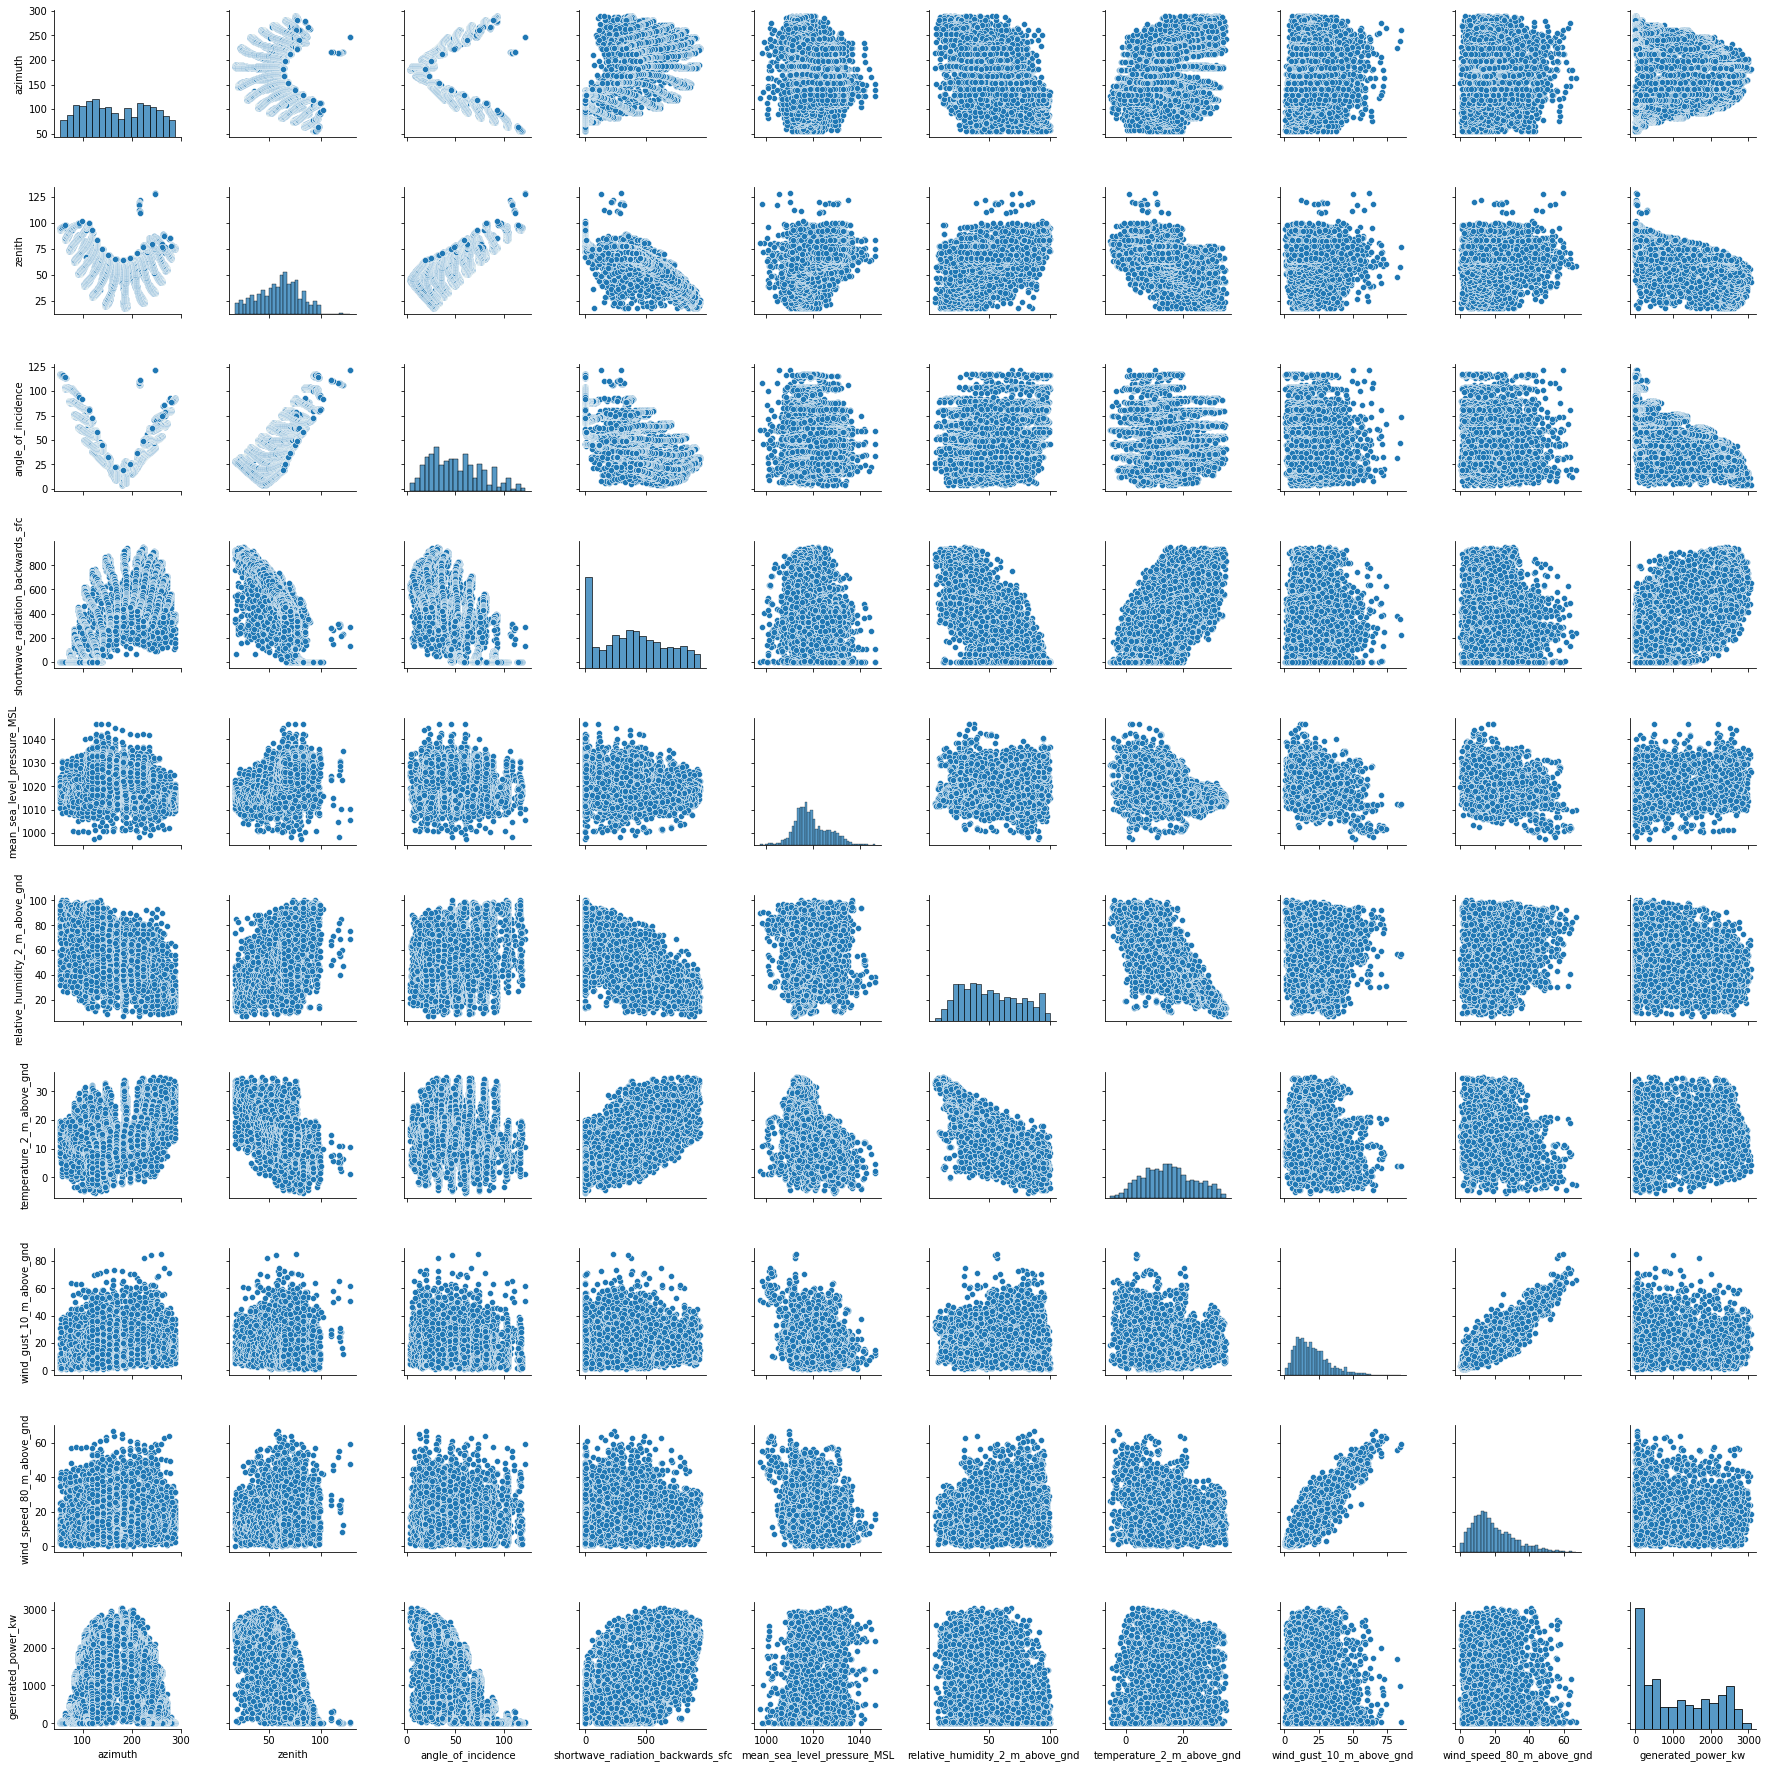

In [ ]:
sns.pairplot(Train_Selected)

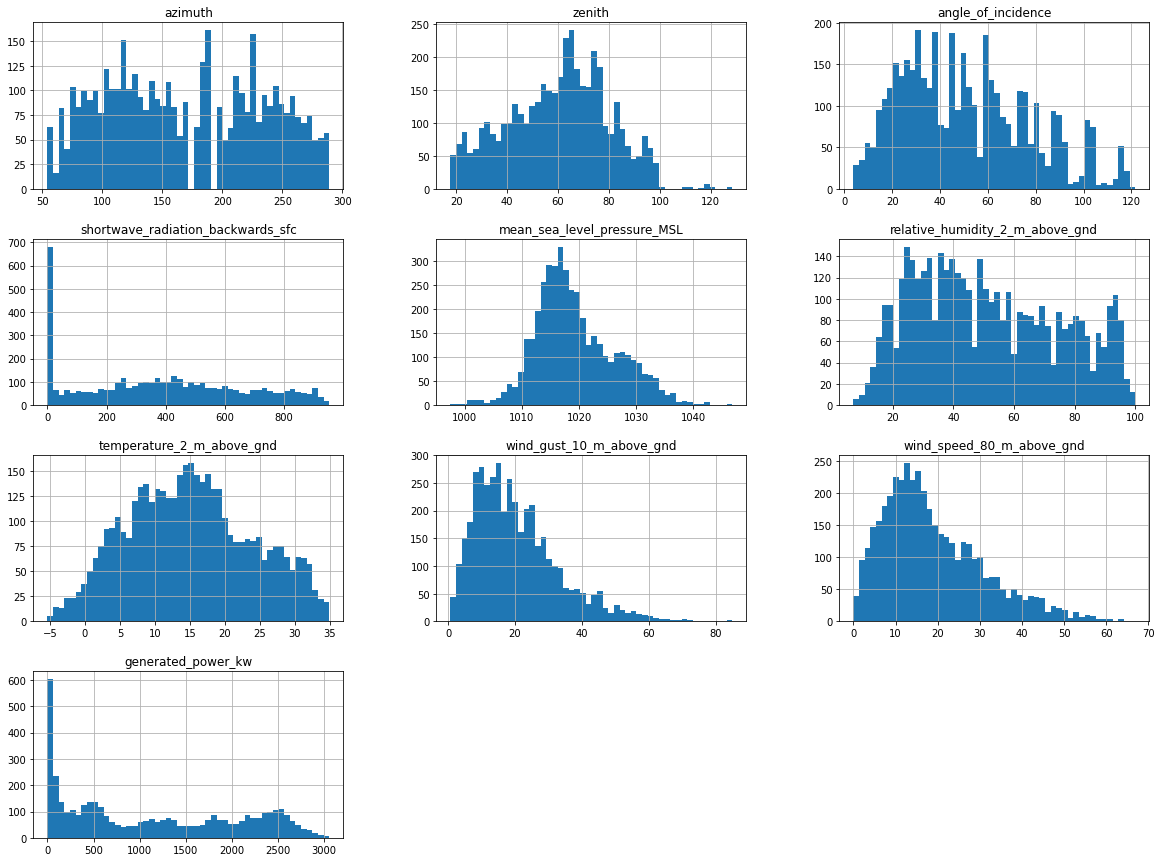

In [ ]:
# Using histograms for numerical data analysis
%matplotlib inline
import matplotlib.pyplot as plt
Train_Selected.hist(bins = 50, figsize = (20, 15))
plt.show()

In [ ]:
Train_Selected.shape

(4213, 10)

In [ ]:
# Independent variable
X = Train_Selected.drop("generated_power_kw", axis = 1)
# dependent variable
y = Train["generated_power_kw"]

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                   random_state=42)

In [ ]:
#Training the xgboost model
xgb_model = XGBRegressor(random_state = 1)#to instantiate the the model
xgb_model.fit(X_train, y_train)#to train the model

[07:55:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

In [ ]:
#Evaluating the xgboost model
from sklearn.metrics import r2_score
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
xgb_AME = mean_absolute_error(y_test, y_pred)
xgb_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("XGB for selected Model Mean absolute error", xgb_AME)
print("XGB for selected Model root mean absolute error", xgb_RMSE)
print("XGB for selected Model r2_score", r2)

XGB for selected Model Mean absolute error 327.58708226281533
XGB for selected Model root mean absolute error 467.0784790060246
XGB for selected Model r2_score 0.7519220486162945


In [ ]:
#checking underfitting or overfitting
y_train_pred =  xgb_model.predict(X_train)
xgb_RMSE_t = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("XGB for selected Model root mean square error", xgb_RMSE_t)
r2_t = r2_score(y_train,y_train_pred)
print("XGB for selected Model r2_score", r2_t)


XGB for selected Model root mean square error 398.5994358772875
XGB for selected Model r2_score 0.8193579118410053


In [ ]:
#The first 20 predicted
output_power = pd.DataFrame(y_train[0:20])
output_power['predicted'] = y_train_pred[0:20]
output_power['Difference'] = output_power['predicted'] - output_power['generated_power_kw']

In [ ]:
#The first 20 predicted
print(output_power,"\n")
print("model training performance:")
print("...........................")
print("RMSE is {}".format(xgb_RMSE_t))
print("R2 score is {}".format(r2_t))
print("\n")

      generated_power_kw    predicted   Difference
1812         1222.920600  1142.033447   -80.887153
2282            0.281389    75.632050    75.350661
1650         1178.490000  1227.218140    48.728140
2924          272.775280  1737.100952  1464.325672
3449         2344.293800  1843.395264  -500.898536
3127          750.271370  1664.149658   913.878288
3963         2462.948000  2242.530029  -220.417971
383           149.702220   374.968384   225.266164
3370           10.096774   109.212105    99.115331
370          2594.614200  1276.849487 -1317.764713
2097         1779.120600  1777.480957    -1.639643
2022         2205.045000  2138.612793   -66.432207
3948           24.401220   183.790436   159.389216
1105         2019.545600  1296.544434  -723.001166
3258         2006.470300  1337.287964  -669.182336
1437          521.225830   314.924194  -206.301636
2807          661.308150  2012.318481  1351.010331
141          1457.470500  1142.730591  -314.739909
3656          594.153890   759.

In [ ]:
# Predicting on unseen data
y_test_pred =  xgb_model.predict(X_test)
xgb_RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
#The first 20 predicted
output_power = pd.DataFrame(y_test[0:20])
output_power['predicted'] = y_test_pred[0:20]
output_power['Difference'] = output_power['predicted'] - output_power['generated_power_kw']

In [ ]:
#The first 20 predicted
print(output_power,"\n")
print("model test performance:")
print("...........................")
print("RMSE is {}".format(xgb_RMSE_test))
print("R2 score is {}".format(r2_t))
print("\n")

      generated_power_kw    predicted   Difference
643          2511.237500  2249.763916  -261.473584
166           480.205120   385.117676   -95.087444
1444         2017.568700  1881.013428  -136.555272
1877          760.140120   391.173676  -368.966444
463           220.395000   237.677612    17.282612
157            25.226724   116.660385    91.433661
1808            0.056667   -40.957428   -41.014095
2638         2497.532800  2326.334473  -171.198327
1867          514.647220   468.722137   -45.925083
2053          916.919160  1311.766235   394.847075
1627         1911.945100  1674.995605  -236.949495
3859           35.146667   219.013474   183.866807
3972         2449.038100  1922.665405  -526.372695
184            38.837352   805.103760   766.266408
1652          823.411110  1999.385132  1175.974022
1978         2274.646400  2063.489746  -211.156654
2515         1123.399400  1118.309326    -5.090074
457           946.531670  1935.322021   988.790351
2316         1651.138100  1777.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


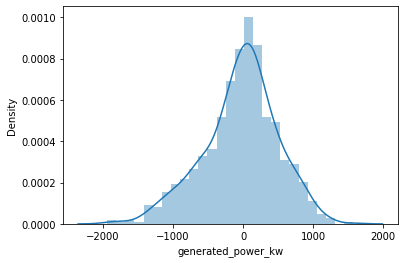

In [ ]:
sns.distplot(y_test-y_test_pred)

Randomforest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(random_state =1)
RF_model = RF.fit(X_train, y_train)

In [ ]:
#finding predicted values
y_test_pred = RF_model.predict(X_test)

In [ ]:
#Calculating the mean absolute and root mean squared error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
y_train_pred = RF_model.predict(X_train)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("RF for selected Model Mean Absolute Error:", MAE)
print("RF for selected Model mean squared Error:", MSE)
print("RF for selected Model Root Mean Squared Error:", RMSE)
print("RF for selected Model R2 score:",r2)

RF for selected Model Mean Absolute Error: 295.87140262727866
RF for selected Model mean squared Error: 210540.85504180353
RF for selected Model Root Mean Squared Error: 458.84731125048944
RF for selected Model R2 score: 0.7605885954059348


In [ ]:
#Checking for underfitting and overfitting
y_train_pred = RF_model.predict(X_train)
MSE_t = mean_squared_error(y_train, y_train_pred)
RMSE_t = np.sqrt(MSE_t)
r2_t = r2_score(y_train, y_train_pred)
print("RF for selected features r2  Error for training features:", r2_t)
print("RF for selected Model Root Mean Squared Error for training features:",RMSE_t)


RF for selected features r2  Error for training features: 0.9673309055539671
RF for selected Model Root Mean Squared Error for training features: 169.51016846549697


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


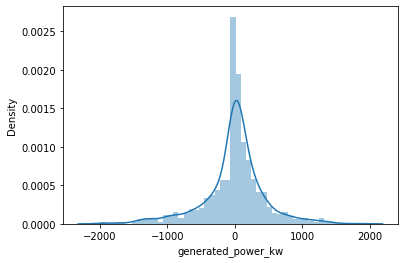

In [ ]:
sns.distplot(y_test-y_test_pred)

**Linear** **Regression**

In [ ]:
Train_Selected.columns

Index(['azimuth', 'zenith', 'angle_of_incidence',
       'shortwave_radiation_backwards_sfc', 'mean_sea_level_pressure_MSL',
       'relative_humidity_2_m_above_gnd', 'temperature_2_m_above_gnd',
       'wind_gust_10_m_above_gnd', 'wind_speed_80_m_above_gnd',
       'generated_power_kw'],
      dtype='object')

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
X =Train_Selected.drop('generated_power_kw', axis=1)
y = Train_Selected['generated_power_kw']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=1)

Interpreting the Model

In [ ]:
print("model intercept:", lr.intercept_,"\n")
print("model coefficient:", lr.coef_,"\n")
for i in range(len(X.columns)):
  print(Train_Selected.columns[i], ":",lr.coef_[i])

model intercept: -16497.50391423371 

model coefficient: [ -7.2563623   -3.36654386 -14.62582443   1.68540101  19.33262937
  -6.19142219  -8.35591889  -3.63581319  -1.86958421] 

azimuth : -7.256362302214792
zenith : -3.36654385899605
angle_of_incidence : -14.625824429590951
shortwave_radiation_backwards_sfc : 1.685401013420897
mean_sea_level_pressure_MSL : 19.332629373847777
relative_humidity_2_m_above_gnd : -6.191422193776087
temperature_2_m_above_gnd : -8.355918894207717
wind_gust_10_m_above_gnd : -3.6358131908632187
wind_speed_80_m_above_gnd : -1.8695842051076907


Model Evaluation

In [ ]:
#Evaluating on test data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_test_pred = lr.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
#The first 20 predicted
output_power = pd.DataFrame(y_test[0:20])
output_power['predicted'] = y_test_pred[0:20]
output_power['Difference'] = output_power['predicted'] - output_power['generated_power_kw']

In [ ]:
#Evaluating on training data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
train_pred = lr.predict(X_train)
RMSE_traing = np.sqrt(mean_squared_error(y_train, train_pred))
r2_training = r2_score(y_train, train_pred)



In [ ]:
#The first 20 predicted values
output_power = pd.DataFrame(y_train[0:20])
output_power['predicted'] = y_train_pred[0:20]
output_power['Difference'] = output_power['predicted'] - output_power['generated_power_kw']

In [ ]:
print(output_power,"\n")
print("model training performance:")
print("...........................")
print("RMSE is {}".format(RMSE_traing))
print("R2 score is {}".format(r2_training))
print("\n")

      generated_power_kw    predicted   Difference
1613          1954.28140  1206.841270  -747.440130
1995          1267.48170     1.809544 -1265.672156
3531          1337.05390  1187.285652  -149.768248
598           2739.63070   611.983626 -2127.647074
2671           408.48878  2182.775454  1774.286674
2512          2417.71440  1135.777126 -1281.937274
1403          2510.73720  2421.919145   -88.818055
1038          1899.59850   387.920154 -1511.678346
3164          2640.65030    10.273338 -2630.376962
2245          2406.84670  2044.278817  -362.567883
1177           130.94780  1753.473346  1622.525546
2620          2162.65190  2086.525645   -76.126255
2481          1086.88190    28.848254 -1058.033646
2936          2033.79060  1662.802614  -370.987986
2470          2184.30810  1783.356380  -400.951720
3220           505.02472   397.366823  -107.657897
3696          1927.20060  1127.735317  -799.465283
3799          2082.94140  1302.518625  -780.422775
2667          1032.68490   604.

In [ ]:
print(output_power,"\n")
print("model test performance:")
print("...........................")
print("RMSE is {}".format(RMSE_test))
print("R2 score is {}".format(r2_test))
print("\n")

      generated_power_kw    predicted   Difference
1268          989.796110  1247.308642   257.512532
1999           24.208084   270.282026   246.073942
1495          507.948740   338.217304  -169.731436
2558          682.708210   641.684043   -41.024167
3078         2806.137400  1812.120949  -994.016451
1435          773.835980  1461.428431   687.592451
2723           27.198889   137.415622   110.216733
3985          236.972340  1187.875369   950.903029
2030         1155.957800  1090.087897   -65.869903
331           509.226940  1634.798018  1125.571078
3731         2090.364200  1802.563347  -287.800853
2179          441.906940   543.516032   101.609092
2097         1779.120600  1764.650607   -14.469993
1006          526.546060  1383.801658   857.255598
757           513.769580   597.397891    83.628311
1020          858.943610  1366.373432   507.429822
2691         1893.028300  2149.244450   256.216150
1958         1807.713100  1771.290801   -36.422299
1264         2018.105000  1814.

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
rr = Ridge()
rr.fit(X_train, y_train)


Ridge()

In [ ]:
#Evaluating on training data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
train_pred = rr.predict(X_train)
RMSE_traing = np.sqrt(mean_squared_error(y_train, train_pred))
r2_training = r2_score(y_train, train_pred)


In [ ]:
#The first 20 predicted
output_power = pd.DataFrame(y_train[0:20])
output_power['predicted'] = y_train_pred[0:20]
output_power['Difference'] = output_power['predicted'] - output_power['generated_power_kw']

In [ ]:
print(output_power,"\n")
print("model training performance for ridge regression:")
print("...........................")
print("RMSE is {}".format(RMSE_traing))
print("R2 score is {}".format(r2_training))
print("\n")

      generated_power_kw    predicted   Difference
1613          1954.28140  1206.841270  -747.440130
1995          1267.48170     1.809544 -1265.672156
3531          1337.05390  1187.285652  -149.768248
598           2739.63070   611.983626 -2127.647074
2671           408.48878  2182.775454  1774.286674
2512          2417.71440  1135.777126 -1281.937274
1403          2510.73720  2421.919145   -88.818055
1038          1899.59850   387.920154 -1511.678346
3164          2640.65030    10.273338 -2630.376962
2245          2406.84670  2044.278817  -362.567883
1177           130.94780  1753.473346  1622.525546
2620          2162.65190  2086.525645   -76.126255
2481          1086.88190    28.848254 -1058.033646
2936          2033.79060  1662.802614  -370.987986
2470          2184.30810  1783.356380  -400.951720
3220           505.02472   397.366823  -107.657897
3696          1927.20060  1127.735317  -799.465283
3799          2082.94140  1302.518625  -780.422775
2667          1032.68490   604.

In [ ]:
#Evaluating on test data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_test_pred = rr.predict(X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
#The first 20 predicted
output_power = pd.DataFrame(y_test[0:20])
output_power['predicted'] = y_test_pred[0:20]
output_power['Difference'] = output_power['predicted'] - output_power['generated_power_kw']

In [ ]:
print(output_power,"\n")
print("model test performance:")
print("...........................")
print("RMSE is {}".format(RMSE_test))
print("R2 score is {}".format(r2_test))
print("\n")

      generated_power_kw    predicted   Difference
1268          989.796110  1260.090671   270.294561
1999           24.208084   249.669473   225.461389
1495          507.948740   363.951516  -143.997224
2558          682.708210   618.891540   -63.816670
3078         2806.137400  1850.711784  -955.425616
1435          773.835980  1467.918973   694.082993
2723           27.198889   137.095257   109.896368
3985          236.972340  1193.509725   956.537385
2030         1155.957800  1086.488291   -69.469509
331           509.226940  1679.390404  1170.163464
3731         2090.364200  1773.763521  -316.600679
2179          441.906940   534.723923    92.816983
2097         1779.120600  1751.508169   -27.612431
1006          526.546060  1454.146792   927.600732
757           513.769580   646.078298   132.308718
1020          858.943610  1371.276983   512.333373
2691         1893.028300  2155.642945   262.614645
1958         1807.713100  1759.914598   -47.798502
1264         2018.105000  1834.

Lasso Regression


In [ ]:
from sklearn.linear_model import Lasso
lr= Lasso(alpha=0.000001, max_iter=100000)
lr.fit(X_train, y_train)




Lasso(alpha=1e-06, max_iter=100000)

In [ ]:
#Evaluating on training data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
train_pred = lr.predict(X_train)
RMSE_training = np.sqrt(mean_squared_error(y_train, train_pred))
r2_training = r2_score(y_train, train_pred)

In [ ]:
#The first 20 predicted
output_power = pd.DataFrame(y_train[0:20])
output_power['predicted'] = y_train_pred[0:20]
output_power['Difference'] = output_power['predicted'] - output_power['generated_power_kw']

In [ ]:
print(output_power,"\n")
print("model training performance for lasso regression:")
print("...........................")
print("RMSE is {}".format(RMSE_training))
print("R2 score is {}".format(r2_training))
print("\n")

print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

      generated_power_kw    predicted   Difference
1613          1954.28140  1206.841270  -747.440130
1995          1267.48170     1.809544 -1265.672156
3531          1337.05390  1187.285652  -149.768248
598           2739.63070   611.983626 -2127.647074
2671           408.48878  2182.775454  1774.286674
2512          2417.71440  1135.777126 -1281.937274
1403          2510.73720  2421.919145   -88.818055
1038          1899.59850   387.920154 -1511.678346
3164          2640.65030    10.273338 -2630.376962
2245          2406.84670  2044.278817  -362.567883
1177           130.94780  1753.473346  1622.525546
2620          2162.65190  2086.525645   -76.126255
2481          1086.88190    28.848254 -1058.033646
2936          2033.79060  1662.802614  -370.987986
2470          2184.30810  1783.356380  -400.951720
3220           505.02472   397.366823  -107.657897
3696          1927.20060  1127.735317  -799.465283
3799          2082.94140  1302.518625  -780.422775
2667          1032.68490   604.

In [ ]:
#Evaluating on test data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_test_pred = lr.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
#The first 20 predicted
output_power = pd.DataFrame(y_test[0:20])
output_power['predicted'] = y_test_pred[0:20]
output_power['Difference'] = output_power['predicted'] - output_power['generated_power_kw']

In [ ]:
print(output_power,"\n")
print("model test performance:")
print("...........................")
print("RMSE is {}".format(RMSE_test))
print("R2 score is {}".format(r2_test))
print("\n")

      generated_power_kw    predicted   Difference
1268          989.796110  1260.089603   270.293493
1999           24.208084   249.668998   225.460914
1495          507.948740   363.950691  -143.998049
2558          682.708210   618.889829   -63.818381
3078         2806.137400  1850.711052  -955.426348
1435          773.835980  1467.919227   694.083247
2723           27.198889   137.094200   109.895311
3985          236.972340  1193.510179   956.537839
2030         1155.957800  1086.487553   -69.470247
331           509.226940  1679.391582  1170.164642
3731         2090.364200  1773.763128  -316.601072
2179          441.906940   534.723640    92.816700
2097         1779.120600  1751.508159   -27.612441
1006          526.546060  1454.148828   927.602768
757           513.769580   646.077894   132.308314
1020          858.943610  1371.277661   512.334051
2691         1893.028300  2155.643507   262.615207
1958         1807.713100  1759.915144   -47.797956
1264         2018.105000  1834.

Cross Validation

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [ ]:
K_fold =KFold(n_splits=10, shuffle=True, random_state=42)
count =1
for train_index, test_index in K_fold.split(X, y):
    print(f'Fold:{count}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    count += 1

Fold:1, Train set: 3791, Test set:422
Fold:2, Train set: 3791, Test set:422
Fold:3, Train set: 3791, Test set:422
Fold:4, Train set: 3792, Test set:421
Fold:5, Train set: 3792, Test set:421
Fold:6, Train set: 3792, Test set:421
Fold:7, Train set: 3792, Test set:421
Fold:8, Train set: 3792, Test set:421
Fold:9, Train set: 3792, Test set:421
Fold:10, Train set: 3792, Test set:421


In [ ]:
# cross validation on XGBoost regressor
from sklearn.model_selection import cross_val_score
model = XGBRegressor(objective="reg:squarederror")
scores = cross_val_score(model, X, y, scoring = "neg_mean_squared_error",cv=K_fold)

In [ ]:
rms = np.sqrt(-scores)
print(rms)
mean_value = np.mean(rms)
print(mean_value)

[411.11861069 496.07005073 483.36410054 468.95916308 460.0108269
 437.17137513 484.22126059 419.67271636 485.79763943 446.95053801]
459.3336281457625


In [ ]:
# cross validation on linear regression
lr = LinearRegression()
scores = cross_val_score(lr, X, y, scoring = "neg_mean_squared_error",cv=K_fold)
rms = np.sqrt(-scores)
print(rms)
mean_value = np.mean(rms)
print(mean_value)


[495.14682861 547.95297143 550.72684977 546.2619644  512.13653213
 513.84831131 521.50861993 505.38413441 540.41641835 521.88940773]
525.5272038074429


In [ ]:
# cross validation on Descision Tree Regressor
DTR = tree.DecisionTreeRegressor( random_state=42)
#max_depth = 7
scores = cross_val_score(DTR, X, y, cv=K_fold, scoring = "neg_mean_squared_error")
rms = np.sqrt(-scores)
print(rms)
mean_value = np.mean(rms)
print(mean_value)



[566.22171071 648.54035564 650.29546016 643.79558955 598.2472878
 620.70451059 597.29174958 528.60954976 580.62428708 604.34120089]
603.8671701756497


In [ ]:
# Cross validation on RandomForest Regressor
RFR = ensemble.RandomForestRegressor( random_state=42)
#max_depth =50
scores = cross_val_score(RFR, X, y,cv=K_fold, scoring = 
                         "neg_mean_squared_error")
rms = np.sqrt(-scores)
print(rms)
mean_value = np.mean(rms)
print(mean_value)


[406.05523756 461.08173701 484.88125142 453.93627029 437.57071346
 407.13899628 473.52107227 408.06386791 467.9549107  433.273269  ]
443.347732591546


In [ ]:
# GridSearch Hyperparameter tunninig
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
#regressor = ensemble.RandomForestRegressor(n_jobs=-1)
regressor = XGBRegressor(n_jobs=-1)
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [1, 3, 5]
    
}
model = model_selection.GridSearchCV(
    estimator= regressor, #0
    param_grid = param_grid,
     return_train_score=True,
    scoring = "neg_mean_squared_error",
    verbose = 10,
    n_jobs = 1,
    cv = 10,
)
model.fit(X, y)
print(np.sqrt(-model.best_score_))
print(model.best_estimator_.get_params())


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10; 1/6] START max_depth=1, n_estimators=100..............................
[08:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/10; 1/6] END max_depth=1, n_estimators=100;, score=(train=-255725.655, test=-506797.485) total time=   0.1s
[CV 2/10; 1/6] START max_depth=1, n_estimators=100..............................
[08:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/10; 1/6] END max_depth=1, n_estimators=100;, score=(train=-256642.954, test=-496195.694) total time=   0.1s
[CV 3/10; 1/6] START max_depth=1, n_estimators=100..............................
[08:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/10; 1/6] END max_depth=1, n_estimators=100;, score=(train=-274752.495, test=-3140

In [ ]:
# RandomizedSearch Hyperparameter tunninig
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
#regressor = ensemble.RandomForestRegressor(n_jobs=-1)
#regressor = XGBRegressor(n_jobs=-1)
#param_grid = {
    #"n_estimators": np.arange(100, 1500, 100),
    #"max_depth": np.arange(1, 20),
   #"crirerion": ['squared_error'],
    
#}
#model = model_selection.RandomizedSearchCV(
    #estimator= regressor, #0
    #param_distributions = param_grid,
    #n_iter = 10,
    #return_train_score=True,
    #scoring = "neg_mean_squared_error",
    #verbose = 10,
    #n_jobs = 1,
    #cv = 5,
#)
#model.fit(X, y)
#print(np.sqrt(-model.best_score_))
#print(model.best_estimator_.get_params())


In [ ]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start =100, stop=1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

#New Model with Hyparameter Tunning

In [ ]:
#Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [ ]:
#Random seach of parameters, using 5 fold cross validation,
#Seearch across 100 different combinnations
rf_random = RandomizedSearchCV(estimator = RF_model, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [ ]:
#Predicting on X_test
prediction = rf_random.predict(X_test)
prediction[:10]

array([2351.20611401,  314.55154856, 1824.74957487,  395.79368967,
        169.01056591,  122.9344244 ,   10.2937561 , 2450.16354789,
        524.48903339, 1214.9971244 ])

In [ ]:
y_test[:10]

643     2511.237500
166      480.205120
1444    2017.568700
1877     760.140120
463      220.395000
157       25.226724
1808       0.056667
2638    2497.532800
1867     514.647220
2053     916.919160
Name: generated_power_kw, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


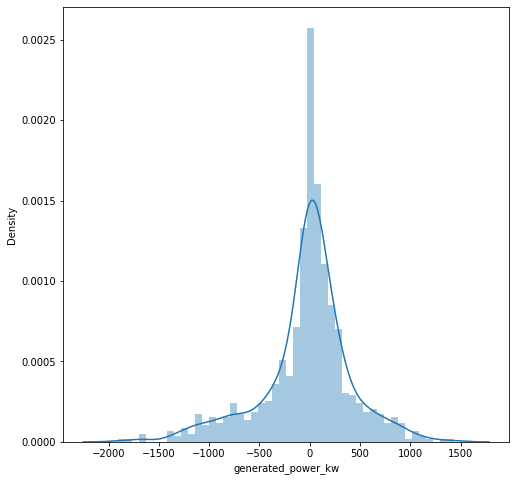

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

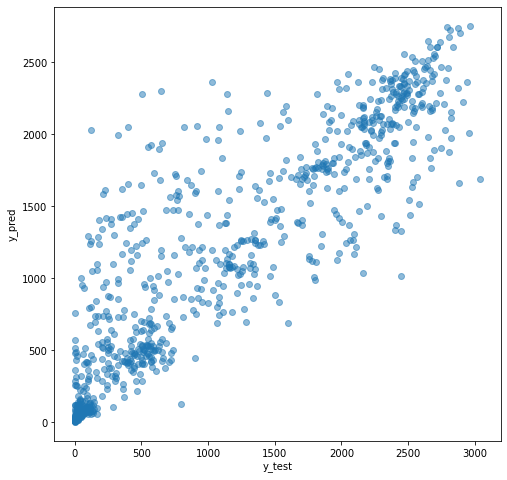

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))


MAE 297.86715529574246
MSE 199292.36920665836
RMSE 446.4217391734618


**Save** **the** **model** **to** **reuse**

In [ ]:
import pickle
# open the file where you want to store the data
file = open('generated_power_rf.pkl', 'wb')
# dump the information to that file
pickle.dump(RF_model, file)

In [ ]:
model = open('generated_power_rf.pkl','rb')
forest = pickle.load(model)
y_prediction = forest.predict(X_test)
y2_prediction = forest.predict(X_train)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
print('r2', r2_score(y_test, y_prediction))

RMSE 289.32635411206496
r2 0.9067922499744253


In [ ]:
print('RMSE',np.sqrt(metrics.mean_squared_error(y_train,y2_prediction)))
print('r2', r2_score(y_train, y2_prediction))

RMSE 288.39677772363865
r2 0.9049333577832774


In [ ]:
#Hyperparameter tuning
#max_depth = [1,2,3,4,5,6,7,8,9,10,20, 30]

#for val in max_depth:
  #DTR = tree.DecisionTreeRegressor(max_depth = val, random_state=42)
  #score = cross_val_score(DTR, X, y, cv= K_fold, scoring="neg_mean_squared_error")
  #print(f'For max depth: {val}')
  #rms = np.sqrt(-scores)
  #print(rms)
  #mean_value = np.mean(rms)
  #print(mean_value)


  

In [ ]:
#hyperparameter tuning
#estimators = [5,10,50, 100, 150, 200]
#RFR = ensemble.RandomForestRegressor(n_estimators = count, random_state=42)

#for count in estimators:
  #RFR = ensemble.RandomForestRegressor(n_estimators = count, random_state=42)
  #score = cross_val_score(RFR, X, y, cv= K_fold, scoring="neg_mean_squared_error")
  #print(f'For estimators: {count}')
  #rms = np.sqrt(-scores)
  #print(rms)
  #mean_value = np.mean(rms)
  #print(mean_value)


  

Observation

1. Decision Tree Regressor and RandomForest Regressor have good scores

with hyperparameter tuning

**Explorative Data Analysis** **and Data Cleaning**

In [ ]:
Features = Train[["temperature_2_m_above_gnd"	,"angle_of_incidence","wind_gust_10_m_above_gnd",
            "wind_direction_10_m_above_gnd","zenith","shortwave_radiation_backwards_sfc","mean_sea_level_pressure_MSL",
"relative_humidity_2_m_above_gnd","total_cloud_cover_sfc","azimuth", "generated_power_kw" ]]

In [ ]:
Train_corr_matrix = Features.corr()


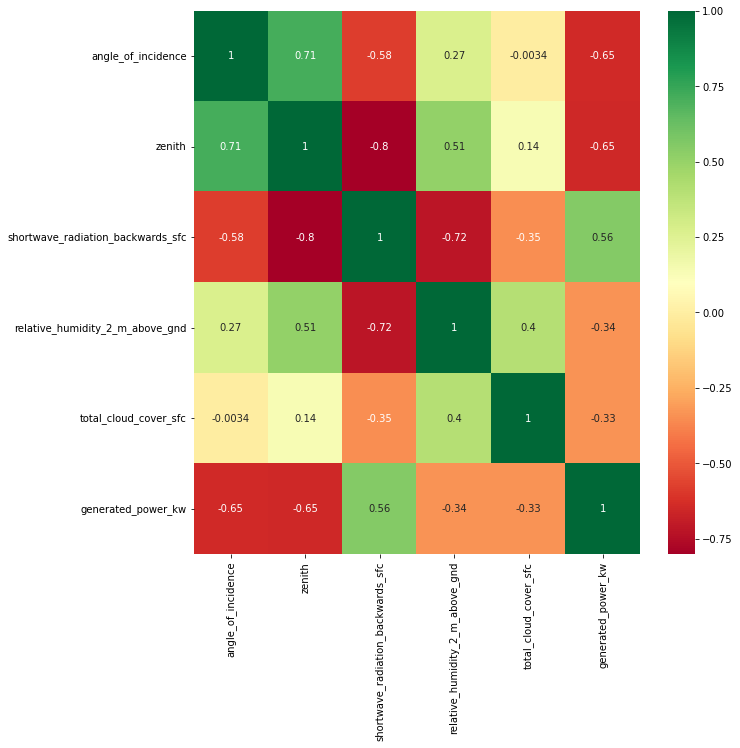

In [ ]:
#Finding correlation
Top_Features =  Train_corr_matrix.index[abs(Train_corr_matrix['generated_power_kw']) >= 0.3]
plt.figure(figsize=(10,10))
T = sns.heatmap(Features[Top_Features].corr(), annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
Train_corr_matrix["generated_power_kw"].sort_values(ascending=False)

generated_power_kw                   1.000000
shortwave_radiation_backwards_sfc    0.556148
temperature_2_m_above_gnd            0.217280
mean_sea_level_pressure_MSL          0.150551
azimuth                             -0.061184
wind_direction_10_m_above_gnd       -0.073257
wind_gust_10_m_above_gnd            -0.122808
total_cloud_cover_sfc               -0.334338
relative_humidity_2_m_above_gnd     -0.336783
angle_of_incidence                  -0.646537
zenith                              -0.649991
Name: generated_power_kw, dtype: float64

**DETECTING** **AND** **REMOVING** **OUTLIERS**

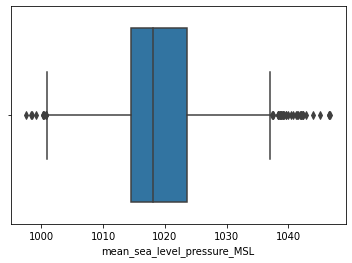

In [ ]:
sns.boxplot(x = Features['mean_sea_level_pressure_MSL'])

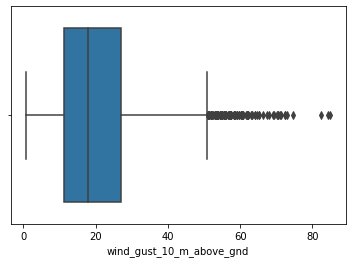

In [ ]:
sns.boxplot(x = Features['wind_gust_10_m_above_gnd'])

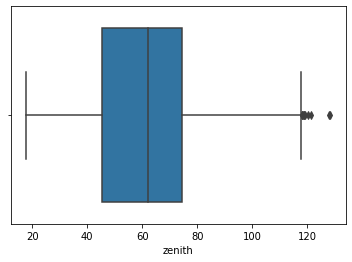

In [ ]:
sns.boxplot(x= Features['zenith'])

In [ ]:
#Removing outliers
Solar_Power_Features = Train[["shortwave_radiation_backwards_sfc","angle_of_incidence","zenith",
                              "temperature_2_m_above_gnd","generated_power_kw",
                              "mean_sea_level_pressure_MSL","azimuth" ,"wind_direction_10_m_above_gnd","wind_gust_10_m_above_gnd", 
                              "total_cloud_cover_sfc","relative_humidity_2_m_above_gnd" ]]# The features
mean_sea_leve_pressure = Solar_Power_Features['mean_sea_level_pressure_MSL']
Q3 = mean_sea_leve_pressure .quantile(0.75)
Q1 = mean_sea_leve_pressure .quantile(0.25)
IQR = Q3 - Q1
lower_boundary = Q1 - (0.9* IQR)
upper_boundary = Q3 + (1.5 * IQR)
outliers_level = mean_sea_leve_pressure [((mean_sea_leve_pressure  < lower_boundary) | (mean_sea_leve_pressure  > upper_boundary))]
outliers_level


10      1038.5
11      1038.4
12      1039.3
13      1039.0
14      1037.6
         ...  
3120    1001.7
3121    1002.6
3122    1003.3
3404    1006.3
3405    1006.3
Name: mean_sea_level_pressure_MSL, Length: 101, dtype: float64

In [ ]:
Solar_Power_Features.loc[Solar_Power_Features ['mean_sea_level_pressure_MSL'] > upper_boundary, 'mean_sea_level_pressure_MSL'] = upper_boundary

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
Solar_Power_Features.loc[Solar_Power_Features['mean_sea_level_pressure_MSL'] < lower_boundary, 'mean_sea_level_pressure_MSL'] = lower_boundary

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


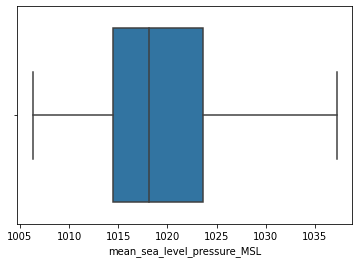

In [ ]:
sns.boxplot(Solar_Power_Features['mean_sea_level_pressure_MSL'])

In [ ]:
wind_gust_10_m_above_gnd = Solar_Power_Features['wind_gust_10_m_above_gnd']
Q3 = wind_gust_10_m_above_gnd .quantile(0.75)
Q1 = wind_gust_10_m_above_gnd .quantile(0.25)
IQR = Q3 - Q1
lower_boundary_2 = Q1 - (1.5* IQR)
upper_boundary_2 = Q3 + (1.5* IQR)
outliers_level = wind_gust_10_m_above_gnd[((wind_gust_10_m_above_gnd  < lower_boundary_2) | (wind_gust_10_m_above_gnd > upper_boundary_2))]
outliers_level


150     51.12
158     56.88
159     55.80
160     57.24
161     58.32
        ...  
4177    53.64
4178    52.92
4179    53.28
4180    55.44
4181    55.44
Name: wind_gust_10_m_above_gnd, Length: 127, dtype: float64

In [ ]:
Solar_Power_Features.loc[Solar_Power_Features ['wind_gust_10_m_above_gnd'] > upper_boundary_2, 'wind_gust_10_m_above_gnd'] = upper_boundary_2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#Solar_Power_Features.loc[Solar_Power_Features['wind_gust_10_m_above_gnd'] < lower_boundary, 'wind_gust_10_m_above_gnd'] = lower_boundary_2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


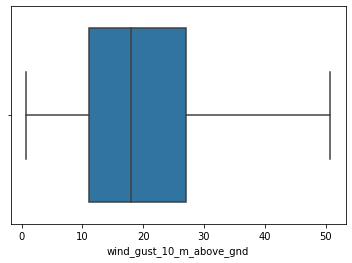

In [ ]:
sns.boxplot(Solar_Power_Features['wind_gust_10_m_above_gnd'])

In [ ]:
zenith = Solar_Power_Features['zenith']
Q3 = zenith .quantile(0.75)
Q1 = zenith .quantile(0.25)
IQR = Q3 - Q1
lower_boundary_3 = Q1 - (1.5* IQR)
upper_boundary_3 = Q3 + (1.5* IQR)
outliers_level = zenith[((zenith < lower_boundary_3) | (zenith> upper_boundary_3))]
outliers_level


9      121.46318
121    120.23022
175    119.35710
200    118.85498
210    118.67814
220    118.49663
230    118.31051
240    118.11981
260    128.41537
280    127.97644
Name: zenith, dtype: float64

In [ ]:
Solar_Power_Features.loc[Solar_Power_Features ['zenith'] > upper_boundary_3, 'zenith'] = upper_boundary_3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


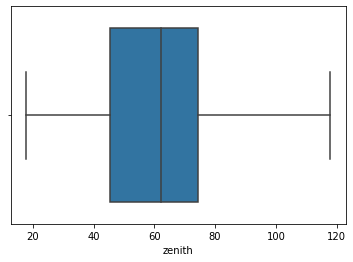

In [ ]:
sns.boxplot(Solar_Power_Features['zenith'])

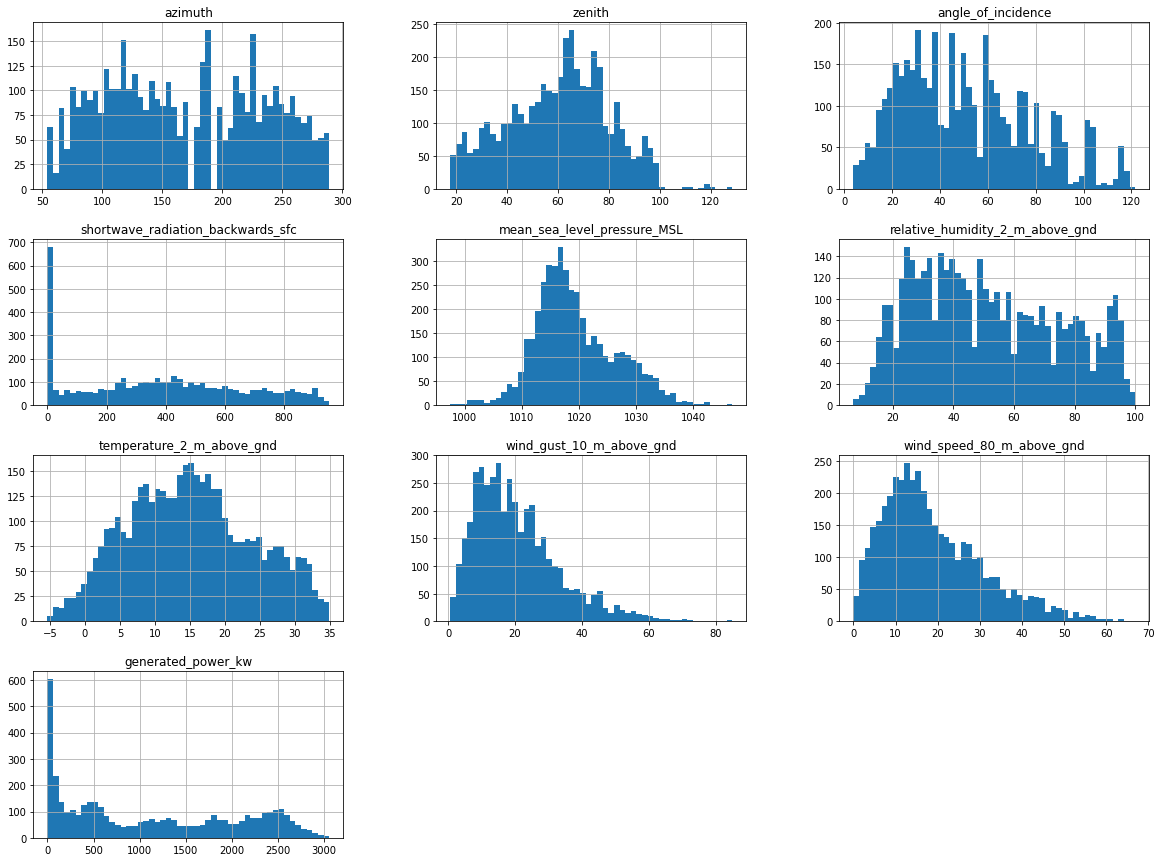

In [ ]:
# Using histograms for numerical data analysis before removing outliers
%matplotlib inline
import matplotlib.pyplot as plt
Train_Selected.hist(bins = 50, figsize = (20, 15))
plt.show()

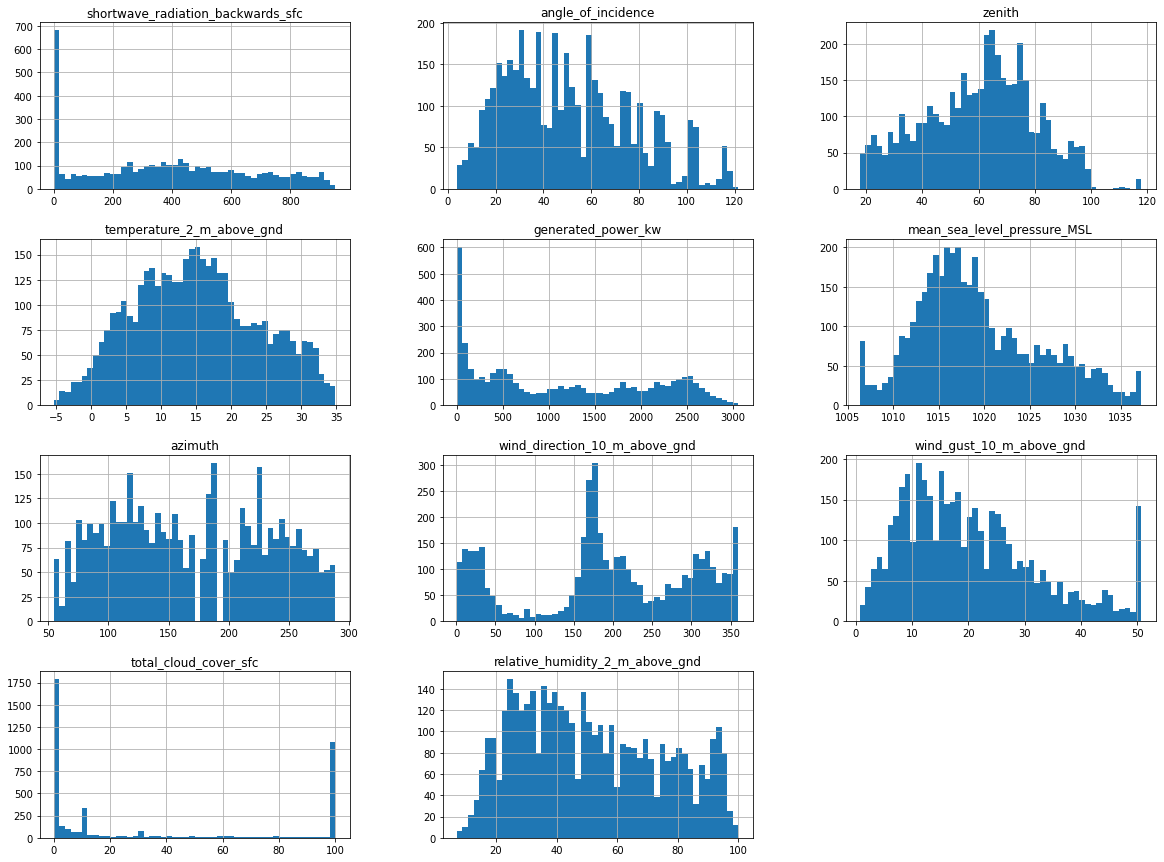

In [ ]:
# Using histograms for numerical data analysis after removing outliers
%matplotlib inline
import matplotlib.pyplot as plt
Solar_Power_Features.hist(bins = 50, figsize = (20, 15))
plt.show()

In [ ]:
Solar_Power_Features.head()

,shortwave_radiation_backwards_sfc,angle_of_incidence,zenith,temperature_2_m_above_gnd,generated_power_kw,mean_sea_level_pressure_MSL,azimuth,wind_direction_10_m_above_gnd,wind_gust_10_m_above_gnd,total_cloud_cover_sfc,relative_humidity_2_m_above_gnd
0,0.00,58.753108,83.237322,2.17,454.10095,1035.0,128.33543,312.71,24.48,0.0,31
1,1.78,45.408585,75.143041,2.31,1411.99940,1035.1,139.65530,294.78,21.96,0.0,27
2,108.58,32.848282,68.820648,3.65,2214.84930,1035.4,152.53769,270.00,14.04,0.0,33
3,258.10,22.699288,64.883536,5.82,2527.60920,1035.4,166.90159,323.13,19.80,0.0,30
4,375.58,19.199908,63.795208,7.73,2640.20340,1034.4,182.13526,10.01,16.56,0.0,27


In [ ]:
y.head()

0     454.10095
1    1411.99940
2    2214.84930
3    2527.60920
4    2640.20340
Name: generated_power_kw, dtype: float64

**Scaling the training data**

In [ ]:
X.head()

,azimuth,zenith,angle_of_incidence,shortwave_radiation_backwards_sfc,mean_sea_level_pressure_MSL,relative_humidity_2_m_above_gnd,temperature_2_m_above_gnd,wind_gust_10_m_above_gnd,wind_speed_80_m_above_gnd
0,128.33543,83.237322,58.753108,0.00,1035.0,31,2.17,24.48,9.36
1,139.65530,75.143041,45.408585,1.78,1035.1,27,2.31,21.96,5.99
2,152.53769,68.820648,32.848282,108.58,1035.4,33,3.65,14.04,3.89
3,166.90159,64.883536,22.699288,258.10,1035.4,30,5.82,19.80,3.55
4,182.13526,63.795208,19.199908,375.58,1034.4,27,7.73,16.56,6.76


In [ ]:
from IPython.core.debugger import Tracer
# Independent variable
X = Train_Selected.drop('generated_power_kw', axis=1)
# dependent variable
y = Train_Selected["generated_power_kw"]

In [ ]:
X.head()


,azimuth,zenith,angle_of_incidence,shortwave_radiation_backwards_sfc,mean_sea_level_pressure_MSL,relative_humidity_2_m_above_gnd,temperature_2_m_above_gnd,wind_gust_10_m_above_gnd,wind_speed_80_m_above_gnd
0,128.33543,83.237322,58.753108,0.00,1035.0,31,2.17,24.48,9.36
1,139.65530,75.143041,45.408585,1.78,1035.1,27,2.31,21.96,5.99
2,152.53769,68.820648,32.848282,108.58,1035.4,33,3.65,14.04,3.89
3,166.90159,64.883536,22.699288,258.10,1035.4,30,5.82,19.80,3.55
4,182.13526,63.795208,19.199908,375.58,1034.4,27,7.73,16.56,6.76


In [ ]:
X.shape

(4213, 9)

In [ ]:
#StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer,RobustScaler, PowerTransformer
#scaler =  StandardScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)


In [ ]:
#power_transformer
def plots(data_frame, var, trans):
  plt.figure(figsize=(13, 5))
  plt.subplot(121)
  sns.kdeplot(data_frame[var])
  plt.title('Before ' + str(trans).split('(')[0])

  plt.subplot(122)
  power_tran =trans.fit_transform(data_frame[[var]]).flatten()
  sns.kdeplot(power_tran)
  plt.title('after ' + str(trans).split('(')[0])


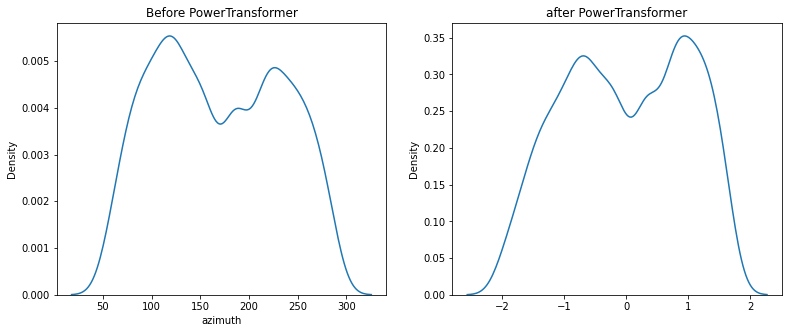

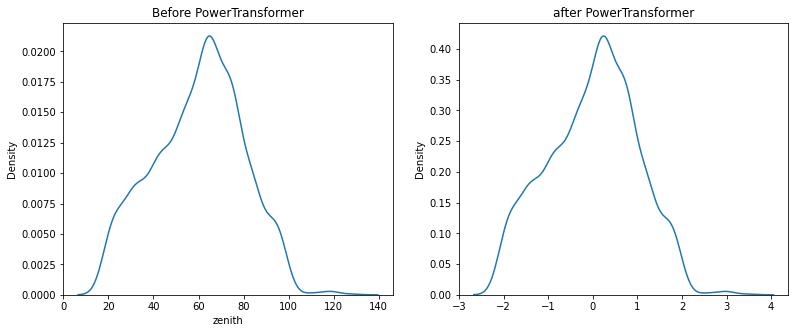

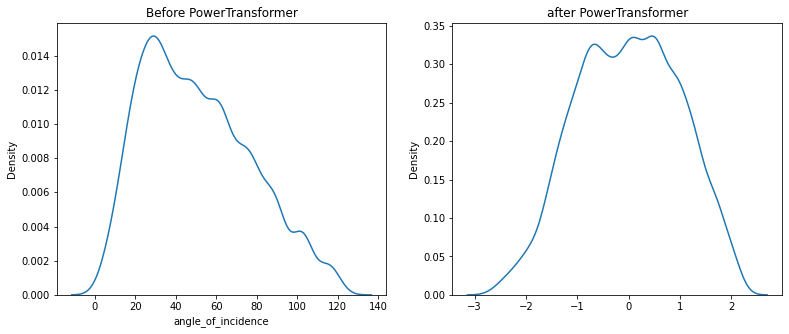

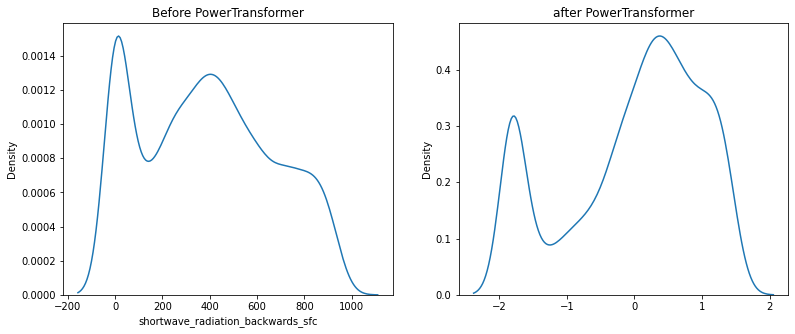

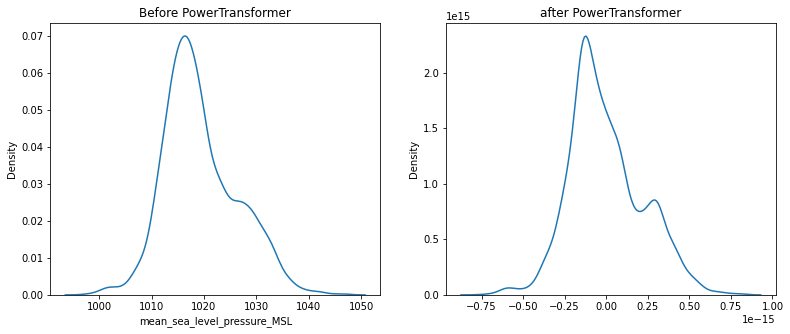

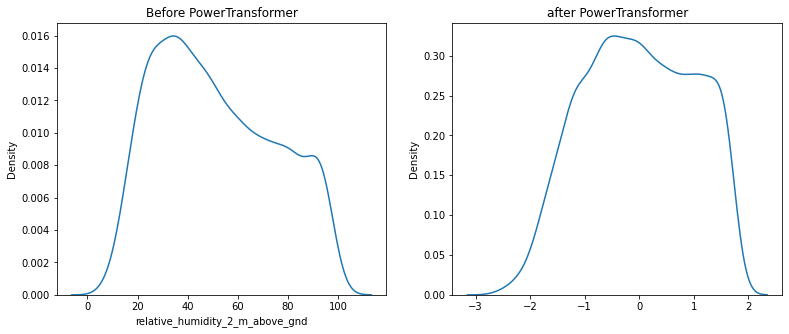

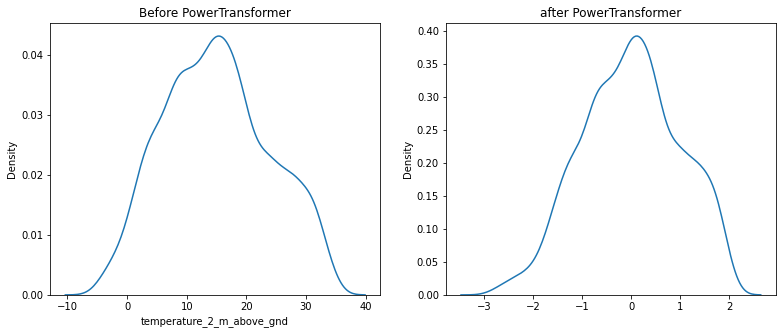

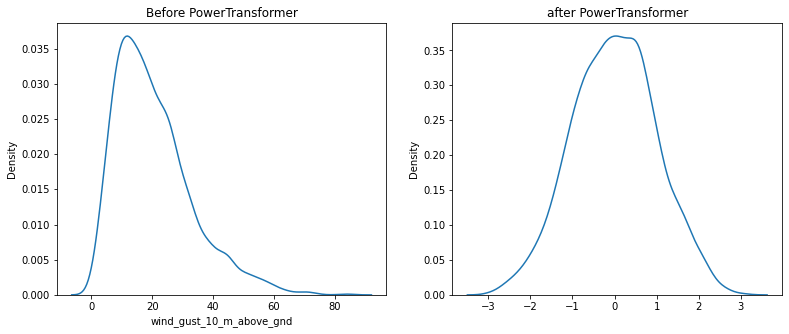

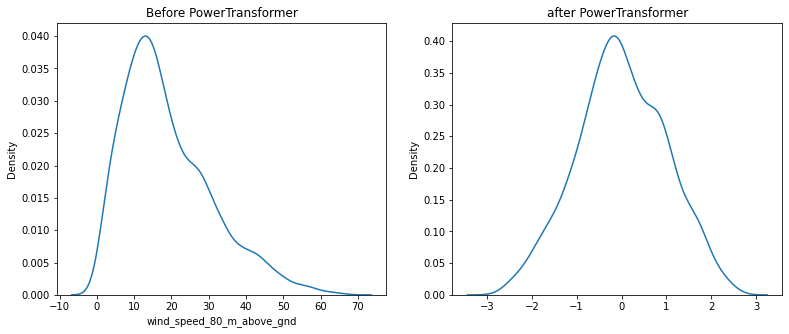

In [ ]:
for col in X.columns:
  plots(X, col, PowerTransformer(method='yeo-johnson'))
  


**MODEL** **CREATION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor( max_depth=4, random_state =42)
RF_model = RF.fit(X_train, y_train)

In [ ]:
#finding predicted values
y_pred = RF_model.predict(X_test)

In [ ]:
def accuracy_scaled(model):
  model_scale = Pipeline([
      ('scaled',PowerTransformer(method='yeo-johnson')),
      ('model', model)])
  
  model_scale.fit(X_train, y_train)
  y_pred = model_scale.predict(X_test)
  mse = mean_squared_error(y_pred, y_test)
  R2 = r2_score(y_pred, y_test)
  rmse =np.sqrt(mse)
  return print('RMSE:',rmse, R2)
accuracy_scaled(RF)
  

RMSE: 509.2809048719282 0.540781438860089


In [ ]:
def accuracy_scaled(model):
  model_scale = Pipeline([
      ('scaled',PowerTransformer('yeo-johnson')),
      ('model', model)])
  
  model_scale.fit(X_train, y_train)
  y_pred = model_scale.predict(X_train)
  mse = mean_squared_error(y_pred, y_train)
  R2 = r2_score(y_pred, y_train)
  rmse =np.sqrt(mse)
  return rmse,R2 
accuracy_scaled(RF)
  

(508.53442141963734, 0.5328037181980131)

In [ ]:
from IPython.core.debugger import Tracer
# Independent variable
X = Train_Selected.drop('generated_power_kw', axis=1)
# dependent variable
y = Train_Selected["generated_power_kw"]

In [ ]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=100, max_depth=4, random_state =42)
RF_model = RF.fit(X_train, y_train)

In [ ]:
#Calculating the mean absolute and root mean squared error
MAE_R = mean_absolute_error(y_test,y_pred)
MSE_R = mean_squared_error(y_test, y_pred)
y_test_pred = RF_model.predict(X_test) # for overfitting or underfitting
from sklearn.metrics import r2_score
r2_R = r2_score(y_test, y_pred)
RMSE_R = np.sqrt(MSE_R)
print("RF for selected Model Mean Absolute Error:", MAE_R)
print("RF for selected Model mean squared Error:", MSE_R)
print("RF for selected Model Root Mean Squared Error:", RMSE_R)
print("RF for selected Model R2 score:",r2_R)

RF for selected Model Mean Absolute Error: 380.3739714637194
RF for selected Model mean squared Error: 257128.77452790865
RF for selected Model Root Mean Squared Error: 507.07866700139203
RF for selected Model R2 score: 0.7185123440594579


In [ ]:
#predicting on train data
y_train_pred = RF_model.predict(X_train) # for overfitting or underfitting
MSE_t = mean_squared_error(y_train, y_train_pred)
RMSE_t = np.sqrt(MSE_t)
r2_t = r2_score(y_train, y_train_pred)
print("RFR r2 score on train data:",r2_t)
print("RFR RMSE on train data:",RMSE_t)

RFR r2 score on train data: 0.7074504997178861
RFR RMSE on train data: 504.8004084949783


In [ ]:
#The first 20 predicted
output_power = pd.DataFrame(y_train[0:20])
output_power['predicted'] = y_train_pred[0:20]
output_power['Difference'] = output_power['predicted'] - output_power['generated_power_kw']

In [ ]:
print(output_power,"\n")
print("model test performance for randomforest regression:")
print("...........................")
print("RMSE is {}".format(RMSE_R))
print("R2 score is {}".format(r2_R))
print("\n")

#print("Number of features used: {}".format(np.sum(RF_model.coef_ != 0)))

      generated_power_kw    predicted   Difference
736            82.954039   938.996776   856.042737
3858          471.241940   475.355561     4.113621
3469         1512.582300  1489.837179   -22.745121
411          1730.847700  1467.121116  -263.726584
2702         1772.746400  2209.905640   437.159240
888          2676.637600  2239.667791  -436.969809
1188          169.674720   504.178296   334.503576
1392         1922.009200  1797.851193  -124.158007
1938            0.815278    50.187883    49.372605
1289          713.439440  1520.466469   807.027029
1041          509.583890   572.639170    63.055280
2164          446.294440   237.356994  -208.937446
657           155.416760   185.147550    29.730790
2542         1923.983200  1803.486707  -120.496493
3983          272.453370  1483.185660  1210.732290
3237         1235.147500  2233.287648   998.140148
1419         1904.698600  1962.992658    58.294058
1905          959.072500   699.551096  -259.521404
4011         2204.653100  1189.

In [ ]:
print(output_power,"\n")
print("model train performance for randomforest regression:")
print("...........................")
print("RMSE is {}".format(RMSE_t))
print("R2 score is {}".format(r2_t))
print("\n")


      generated_power_kw    predicted   Difference
736            82.954039   938.996776   856.042737
3858          471.241940   475.355561     4.113621
3469         1512.582300  1489.837179   -22.745121
411          1730.847700  1467.121116  -263.726584
2702         1772.746400  2209.905640   437.159240
888          2676.637600  2239.667791  -436.969809
1188          169.674720   504.178296   334.503576
1392         1922.009200  1797.851193  -124.158007
1938            0.815278    50.187883    49.372605
1289          713.439440  1520.466469   807.027029
1041          509.583890   572.639170    63.055280
2164          446.294440   237.356994  -208.937446
657           155.416760   185.147550    29.730790
2542         1923.983200  1803.486707  -120.496493
3983          272.453370  1483.185660  1210.732290
3237         1235.147500  2233.287648   998.140148
1419         1904.698600  1962.992658    58.294058
1905          959.072500   699.551096  -259.521404
4011         2204.653100  1189.

In [ ]:
# XGBoost regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=42)#to instantiate the the model
xgb_model.fit(X_train, y_train)#to train the model

[15:31:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

In [ ]:
from sklearn.metrics import r2_score
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
xgb_AME = mean_absolute_error(y_test, y_pred)
xgb_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("XGB for selected Model Mean absolute error", xgb_AME)
print("XGB for selected Model root mean absolute error", xgb_RMSE)
print("XGB for selected Model r2_score", r2)

XGB for selected Model Mean absolute error 317.27410217695683
XGB for selected Model root mean absolute error 453.1171742882179
XGB for selected Model r2_score 0.7752344635032221


In [ ]:
# predicting on training data to check for underfitting and overfitting
y_train_pred =  xgb_model.predict(X_train)
xgb_RMSE_t = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("XGB for selected Model root mean squared  error", xgb_RMSE_t)
r2_t = r2_score(y_train,y_train_pred)
print("XGB for selected Model r2_score", r2_t)


XGB for selected Model root mean squared  error 408.56220197168125
XGB for selected Model r2_score 0.8083643358040298


In [ ]:
# XGBoost regressor
#Scaled  train data
def accuracy_scaled(model):
  model_scale = Pipeline([
      ('scaled',PowerTransformer(method='yeo-johnson')),
      ('model', model)])
  
  model_scale.fit(X_train, y_train)
  y_pred = model_scale.predict(X_test)
  mse = mean_squared_error(y_pred, y_test)
  R2 = r2_score(y_pred, y_test)
  rmse =np.sqrt(mse)
  return print('RMSE:',rmse, R2)
accuracy_scaled(xgb_model)
  

[15:31:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 453.1171742882179 0.6947305224274598


In [ ]:
# XGBoost regressor
#Scaled  test data
def accuracy_scaled(model):
  model_scale = Pipeline([
      ('scaled',PowerTransformer('yeo-johnson')),
      ('model', model)])
  
  model_scale.fit(X_train, y_train)
  y_pred = model_scale.predict(X_train)
  mse = mean_squared_error(y_pred, y_train)
  R2 = r2_score(y_pred, y_train)
  rmse =np.sqrt(mse)
  return rmse, R2
accuracy_scaled(xgb_model)
  

[15:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(408.56220197168125, 0.740936222091467)

In [ ]:
#The first 20 predicted
output_power = pd.DataFrame(y_train[0:20])
output_power['predicted'] = y_train_pred[0:20]
output_power['Difference'] = output_power['predicted'] - output_power['generated_power_kw']

In [ ]:
print(output_power,"\n")
print("model training performance for xgboost regression:")
print("...........................")
print("RMSE is {}".format(xgb_RMSE))
print("R2 score is {}".format(r2))
print("\n")

#print("Number of features used: {}".format(np.sum(xgb_model.coef_ != 0)))

      generated_power_kw    predicted   Difference
736            82.954039   987.776855   904.822816
3858          471.241940   757.005249   285.763309
3469         1512.582300  1215.942383  -296.639917
411          1730.847700  1025.248535  -705.599165
2702         1772.746400  2200.806152   428.059752
888          2676.637600  2652.214111   -24.423489
1188          169.674720   128.427750   -41.246970
1392         1922.009200  1676.562744  -245.446456
1938            0.815278   -88.001114   -88.816392
1289          713.439440  1374.835571   661.396131
1041          509.583890   585.856812    76.272922
2164          446.294440   452.206940     5.912500
657           155.416760   316.564484   161.147724
2542         1923.983200  1768.540161  -155.443039
3983          272.453370  1472.858765  1200.405395
3237         1235.147500  2263.442383  1028.294883
1419         1904.698600  1996.541626    91.843026
1905          959.072500   638.065369  -321.007131
4011         2204.653100  1628.